## Analisis Data Sektor Pariwisata di Indonesia untuk Mendapatkan Informasi yang Menarik ##


### Kelompok 6 Ilmu Komputer Kelas C2 ###
1. Naufal Fakhri Al-Najieb (2309648)
2. Abdurrahman Rauf Budiman (2301102)
3. Haniel Septian Putra Alren (2310978)
4. Muhammad Radhi Maulana (2311119)
5. Yoga Ilham Prasetio (2304539)

### Pendahuluan
Pada laporan ini, kami melakukan analisis data sektor pariwisata di Indonesia berdasarkan dataset dari website Badan Pusat Statistik (https://www.bps.go.id/).

### Load Dataset

In [1]:
#Load Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load Dataset
data_Jumlah_Tamu_Indonesia_Hotel = pd.read_csv("Jumlah Tamu Indonesia pada Hotel Bintang, 2021-2023.csv")
data_Jumlah_Tamu_Asing_Hotel = pd.read_csv("Jumlah Tamu Asing pada Hotel Bintang, 2021-2023.csv")
data_lama_menginap_tamu_1 = pd.read_csv("Rata-Rata Lama Menginap Tamu Pada Hotel Bintang Menurut Provinsi, 2021-2023.csv")

data_Pengeluaran_Wisatawan_1 = pd.read_csv("Rata-Rata Pengeluaran Wisatawan Mancanegara per Kunjungan Menurut Negara Tempat Tinggal , 2019-2021.csv")
data_Pengeluaran_Wisatawan_2 = pd.read_csv("Rata-Rata Pengeluaran Wisatawan Mancanegara per Kunjungan Menurut Negara Tempat Tinggal , 2022-2023.csv")

data_Lama_Tinggal_Wisatawan_Mancanegara_1 = pd.read_csv("Rata-Rata Lama Tinggal Wisatawan Mancanegara Menurut Negara Tempat Tinggal, 2019-2021.csv")
data_Lama_Tinggal_Wisatawan_Mancanegara_2 = pd.read_csv("Rata-Rata Lama Tinggal Wisatawan Mancanegara Menurut Negara Tempat Tinggal, 2022-2023.csv")

data_Jumlah_Kunjungan = pd.read_csv("Jumlah Kunjungan Wisatawan Mancanegara ke Indonesia Menurut Kebangsaan, 2021-2023.csv")
data_devisa_Indonesia = pd.read_csv("Jumlah Devisa Sektor Pariwisata, 2021-2022.csv")

data_Akomodasi_Hotel_1 = pd.read_csv("Jumlah Akomodasi, Kamar, dan Tempat Tidur yang Tersedia pada Hotel Bintang, 2019-2021.csv")
data_Akomodasi_Hotel_2 = pd.read_csv("Jumlah Akomodasi, Kamar, dan Tempat Tidur yang Tersedia pada Hotel Bintang, 2022-2023.csv")

### Data Filter

**1. Data Tamu Indonesia yang Menginap di Hotel Berbintang 2021-2023**

Berikut adalah hasil filtering atau pembersihan dari data tamu Indonesia yang menginap di hotel berbintang dari tahun 2021-2023. Data yang ditampilkan merupakan rata-rata jumlah tamu Indonesia per seribu orang per tahun, serta data jumlah tamu tiap tahunnya per provinsi lokasi hotel berbintang yang dikunjungi.

In [3]:
data_Jumlah_Tamu_Indonesia_Hotel = data_Jumlah_Tamu_Indonesia_Hotel.rename(columns={"38 Provinsi": "Provinsi", 
                                                                                    "Unnamed: 1": "2021", 
                                                                                    "Unnamed: 2": "2022", 
                                                                                    "Unnamed: 3": "2023"}, errors="raise")
data_Jumlah_Tamu_Indonesia_Hotel = data_Jumlah_Tamu_Indonesia_Hotel.drop(40).dropna().reset_index(drop=True)
data_Jumlah_Tamu_Indonesia_Hotel.index += 1
data_Jumlah_Tamu_Indonesia_Hotel.replace('-', np.nan, inplace=True)

In [4]:
data_Jumlah_Tamu_Indonesia_Hotel.info()
tempor = data_Jumlah_Tamu_Indonesia_Hotel
tempor = tempor.dropna().reset_index(drop=True)
mean_asing_indo = tempor[["2021", "2022", "2023"]].apply(pd.to_numeric).mean()

print(mean_asing_indo)
data_Jumlah_Tamu_Indonesia_Hotel[["2021", "2022", "2023"]] = data_Jumlah_Tamu_Indonesia_Hotel[["2021", "2022", "2023"]].fillna(mean_asing_indo)
print(data_Jumlah_Tamu_Indonesia_Hotel)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 1 to 38
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Provinsi  38 non-null     object 
 1   2021      34 non-null     object 
 2   2022      34 non-null     object 
 3   2023      38 non-null     float64
dtypes: float64(1), object(3)
memory usage: 1.3+ KB
2021    1367.930294
2022    1898.077059
2023    2215.552353
dtype: float64
                Provinsi         2021         2022      2023
1                   ACEH       195.25          265    329.90
2         SUMATERA UTARA      1937.91      2748.71   2933.70
3         SUMATERA BARAT      1175.55      1469.14   1434.66
4                   RIAU      1341.38      1795.91   1923.57
5                  JAMBI       386.67       598.32    620.39
6       SUMATERA SELATAN      1502.83      1866.43   1957.90
7               BENGKULU       197.24       231.62    275.91
8                LAMPUNG        642.8       779.9

**2. Data Tamu Asing yang Menginap di Hotel Berbintang 2021-2023**

Berikut adalah hasil filtering atau pembersihan dari data tamu asing yang menginap di hotel berbintang dari tahun 2021-2023. Data yang ditampilkan merupakan rata-rata jumlah tamu asing per seribu orang per tahun, serta data jumlah tamu tiap tahunnya per provinsi lokasi hotel berbintang yang dikunjungi.

In [5]:
data_Jumlah_Tamu_Asing_Hotel = data_Jumlah_Tamu_Asing_Hotel.rename(columns={"38 Provinsi": "Provinsi", 
                                                                            "Unnamed: 1": "2021", 
                                                                            "Unnamed: 2": "2022", 
                                                                            "Unnamed: 3": "2023"}, errors="raise")
data_Jumlah_Tamu_Asing_Hotel = data_Jumlah_Tamu_Asing_Hotel.drop([40]).dropna().reset_index(drop=True)
data_Jumlah_Tamu_Asing_Hotel.index += 1
data_Jumlah_Tamu_Asing_Hotel.replace('-', np.nan, inplace=True)

In [6]:
data_Jumlah_Tamu_Asing_Hotel.info()
temp = data_Jumlah_Tamu_Asing_Hotel
temp = temp.dropna().reset_index(drop=True)
mean_asing = temp[["2021", "2022", "2023"]].apply(pd.to_numeric).mean()

print(mean_asing)
data_Jumlah_Tamu_Asing_Hotel[["2021", "2022", "2023"]] = data_Jumlah_Tamu_Asing_Hotel[["2021", "2022", "2023"]].fillna(mean_asing)
print(data_Jumlah_Tamu_Asing_Hotel)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 1 to 38
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Provinsi  38 non-null     object 
 1   2021      34 non-null     object 
 2   2022      34 non-null     object 
 3   2023      38 non-null     float64
dtypes: float64(1), object(3)
memory usage: 1.3+ KB
2021     19.092353
2022     89.048529
2023    200.113529
dtype: float64
                Provinsi       2021       2022     2023
1                   ACEH       0.12       0.88     7.30
2         SUMATERA UTARA       4.93      32.05   113.33
3         SUMATERA BARAT       2.37       9.91    30.06
4                   RIAU       5.41      10.34    14.93
5                  JAMBI       0.81       2.08     3.37
6       SUMATERA SELATAN       3.23        4.7     7.55
7               BENGKULU       0.03       0.12     0.42
8                LAMPUNG       0.57       1.65     3.47
9   KEP. BANGKA BELITUNG       0.58 

**3. Data Pengeluaran Wisatawan Mancanegara 2019-2021**

Berikut adalah hasil filtering atau pembersihan dari data pengeluaran wisatawan mancanegara dari tahun 2019-2021. Data yang ditampilkan merupakan jumlah pengeluaran wisatawan mancanegara tiap kunjungan per tahun, serta data jumlah pengeluaran wisatawan mancanegara tiap tahunnya, berdasarkan asal wisatawan.

In [7]:
data_Pengeluaran_Wisatawan_1 = data_Pengeluaran_Wisatawan_1.rename(columns={'Negara Tempat Tinggal': 'Asal Wisatawan', 
                                                                            '2019': '2019', 
                                                                            '2020': '2020', 
                                                                            '2021': '2021'}, errors="raise")
data_Pengeluaran_Wisatawan_1 = data_Pengeluaran_Wisatawan_1.drop(41).dropna().reset_index(drop=True)
data_Pengeluaran_Wisatawan_1.index += 1
data_Pengeluaran_Wisatawan_1.replace('-', np.nan, inplace=True)

In [8]:
data_Pengeluaran_Wisatawan_1.info()

tempor_W = data_Pengeluaran_Wisatawan_1
tempor_W = tempor_W.dropna().reset_index(drop=True)
mean_Pengeluaran_Wisatawan_1 = tempor_W[["2019", "2020", "2021"]].apply(pd.to_numeric).mean()
print(mean_Pengeluaran_Wisatawan_1)

data_Pengeluaran_Wisatawan_1[["2019", "2020", "2021"]] = data_Pengeluaran_Wisatawan_1[["2019", "2020", "2021"]].fillna(mean_Pengeluaran_Wisatawan_1)
print(data_Pengeluaran_Wisatawan_1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 1 to 39
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Asal Wisatawan  39 non-null     object 
 1   2019            38 non-null     object 
 2   2020            4 non-null      object 
 3   2021            39 non-null     float64
dtypes: float64(1), object(3)
memory usage: 1.3+ KB
2019     841.9950
2020    1848.0300
2021    1880.9475
dtype: float64
       Asal Wisatawan     2019     2020     2021
1   Brunei Darussalam   480.15  1848.03   688.23
2            Malaysia   495.16   936.99  1374.65
3            Filipina   823.05  1848.03     0.00
4           Singapura   849.77  1929.97  1359.61
5            Thailand   878.29  1848.03  5097.13
6           Hong Kong  1082.72  1848.03     0.00
7               India  1080.42  1848.03     0.00
8              Jepang    943.6  2045.74  1677.66
9       Korea Selatan  1144.66  1848.03  1916.25
10           Paki

**4. Data Pengeluaran Wisatawan Mancanegara 2022-2023**

Berikut adalah hasil filtering atau pembersihan dari data pengeluaran wisatawan mancanegara dari tahun 2022-2023. Data yang ditampilkan merupakan jumlah pengeluaran wisatawan mancanegara tiap kunjungan per tahun, serta data jumlah pengeluaran wisatawan mancanegara tiap tahunnya, berdasarkan asal wisatawan.

In [9]:
data_Pengeluaran_Wisatawan_2 =  data_Pengeluaran_Wisatawan_2.rename(columns={'Negara Tempat Tinggal': 'Asal Wisatawan', 
                                                                             'Unnamed: 1': '2022', 
                                                                             'Unnamed: 2': '2023'}, errors="raise")
data_Pengeluaran_Wisatawan_2 = data_Pengeluaran_Wisatawan_2.drop(41).dropna().reset_index(drop=True)
data_Pengeluaran_Wisatawan_2.index += 1
data_Pengeluaran_Wisatawan_2.replace('-', np.nan, inplace=True)

In [10]:
data_Pengeluaran_Wisatawan_2.info()

tempor_W_2 = data_Pengeluaran_Wisatawan_2
tempor_W_2 = tempor_W_2.dropna().reset_index(drop=True)
mean_Pengeluaran_Wisatawan_2 = tempor_W_2[["2022", "2023"]].apply(pd.to_numeric).mean()
print(mean_Pengeluaran_Wisatawan_2)

data_Pengeluaran_Wisatawan_2[["2022", "2023"]] = data_Pengeluaran_Wisatawan_2[["2022", "2023"]].fillna(mean_Pengeluaran_Wisatawan_2)
print(data_Pengeluaran_Wisatawan_2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 1 to 39
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Asal Wisatawan  39 non-null     object
 1   2022            21 non-null     object
 2   2023            35 non-null     object
dtypes: object(3)
memory usage: 1.0+ KB
2022    1944.279524
2023    2347.361905
dtype: float64
       Asal Wisatawan         2022         2023
1   Brunei Darussalam  1944.279524       943.73
2            Malaysia       669.41       591.03
3            Filipina  1944.279524       768.43
4           Singapura       796.59       929.82
5            Thailand  1944.279524       683.27
6           Hong Kong      1265.81       1463.3
7               India  1944.279524      1674.07
8              Jepang      1462.21      1403.97
9       Korea Selatan  1944.279524      1506.48
10           Pakistan  1944.279524      2041.79
11         Bangladesh  1944.279524  2347.361905
12     

**5. Data Lama Tinggal Wisatawan Mancanegara 2019-2021**

Berikut adalah hasil filtering atau pembersihan dari data lama tinggal wisatawan mancanegara dari tahun 2019-2021. Data yang ditampilkan mencakup rata-rata lama tinggal wisatawan mancanegara di Indonesia dalam jumlah hari, berdasarkan negara asal wisatawan setiap tahunnya.

In [11]:
data_Lama_Tinggal_Wisatawan_Mancanegara_1 = data_Lama_Tinggal_Wisatawan_Mancanegara_1.rename(columns={"Negara Tempat Tinggal": "Asal Wisatawan", 
                                                                                                      "Unnamed: 1": "2019", 
                                                                                                      "Unnamed: 2": "2020", 
                                                                                                      "Unnamed: 3": "2021"}, 
                                                                                        errors="raise").drop(41).dropna().reset_index(drop=True)
data_Lama_Tinggal_Wisatawan_Mancanegara_1.index += 1

print(data_Lama_Tinggal_Wisatawan_Mancanegara_1)

       Asal Wisatawan   2019   2020   2021
1   Brunei Darussalam   7.04   8.05   6.64
2            Malaysia   5.29   2.96   2.13
3            Filipina    6.3   8.62   3.82
4           Singapura   3.07   3.82   2.74
5            Thailand   7.89   13.3   4.73
6           Hong Kong   8.67   2.66   2.52
7               India   7.05   9.98   7.30
8              Jepang   6.94  10.49  61.68
9       Korea Selatan   8.81  16.72  46.77
10           Pakistan  19.11   28.4  27.11
11         Bangladesh   5.97   7.75   4.36
12           Srilanka   7.12  14.47   7.89
13             Taiwan   7.56  11.54  21.33
14               Cina  10.71  27.03  17.03
15         Arab Saudi  13.17  14.12  28.93
16            Austria  15.71  18.05   5.76
17             Belgia  14.91  20.24  19.03
18            Denmark  14.84  16.31  30.33
19           Perancis  14.56  20.05  22.15
20             Jerman  15.86     20  33.34
21             Italia  13.59  21.33  14.82
22            Belanda  18.03  14.96   4.73
23         

**6. Data Lama Tinggal Wisatawan Mancanegara 2022-2023**

Berikut adalah hasil filtering atau pembersihan dari data lama tinggal wisatawan mancanegara dari tahun 2022-2023. Data yang ditampilkan mencakup rata-rata lama tinggal wisatawan mancanegara di Indonesia dalam jumlah hari, berdasarkan negara asal wisatawan setiap tahunnya.

In [12]:
data_Lama_Tinggal_Wisatawan_Mancanegara_2 = data_Lama_Tinggal_Wisatawan_Mancanegara_2.rename(columns={"Negara Tempat Tinggal": "Asal Wisatawan", 
                                                                                                      "Unnamed: 1": "2022", 
                                                                                                      "Unnamed: 2": "2023"}, 
                                                                                        errors="raise").drop(41).dropna().reset_index(drop=True)
data_Lama_Tinggal_Wisatawan_Mancanegara_2.index += 1

print(data_Lama_Tinggal_Wisatawan_Mancanegara_2)

       Asal Wisatawan   2022   2023
1   Brunei Darussalam   9.56   7.31
2            Malaysia   4.31   3.25
3            Filipina  10.39   4.56
4           Singapura   3.97   2.96
5            Thailand  11.57    4.5
6           Hong Kong   3.63   2.03
7               India   8.94   7.08
8              Jepang  19.14  10.05
9       Korea Selatan  14.07   9.98
10           Pakistan  29.68  21.12
11         Bangladesh  23.72    5.4
12           Srilanka  28.42   9.24
13             Taiwan  17.88   7.55
14               Cina  42.65  26.98
15         Arab Saudi  15.42  12.83
16            Austria  19.28   6.73
17             Belgia  18.57  17.34
18            Denmark  19.21  17.97
19           Perancis  17.85  16.45
20             Jerman  19.79  17.64
21             Italia  15.99  14.06
22            Belanda  21.01   9.66
23            Spanyol  16.82   8.92
24           Portugal  11.14  10.74
25             Swedia  18.91   9.76
26              Swiss  19.72  17.18
27            Inggris  14.85

**7. Data Jumlah Kunjungan Wisatawan Mancanegara ke Indonesia Menurut Kebangsaan 2021-2023**

Berikut adalah hasil filtering atau pembersihan dari data jumlah kunjungan wisatawan mancanegara ke Indonesia dari tahun 2021-2023. Data yang ditampilkan merupakan rata-rata jumlah kunjungan wisatawan mancanegara ke Indonesia per tahun, serta data jumlah kunjungan wisatawan mancanegara ke Indonesia tiap tahunnya, berdasarkan asal wisatawan.

In [13]:
data_Jumlah_Kunjungan = data_Jumlah_Kunjungan.rename(columns={'Kebangsaan': 'Asal Wisatawan', 
                                                              'Unnamed: 1': '2021', 
                                                              'Unnamed: 2': '2022', 
                                                              'Unnamed: 3': '2023'}, errors="raise")
data_Jumlah_Kunjungan = data_Jumlah_Kunjungan.drop(64).dropna().reset_index(drop=True)
data_Jumlah_Kunjungan.index += 1
data_Jumlah_Kunjungan.replace('-', np.nan, inplace=True)

In [14]:
data_Jumlah_Kunjungan.info()
tempor_K = data_Jumlah_Kunjungan
tempor_K = tempor_K.dropna().reset_index(drop=True)
mean_data_Jumlah_Kunjungan = tempor_K[["2021", "2022", "2023"]].apply(pd.to_numeric).mean()
print(mean_data_Jumlah_Kunjungan)

data_Jumlah_Kunjungan[["2021", "2022", "2023"]] = data_Jumlah_Kunjungan[["2021", "2022", "2023"]].fillna(mean_data_Jumlah_Kunjungan)
print(data_Jumlah_Kunjungan)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 1 to 62
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Asal Wisatawan  62 non-null     object 
 1   2021            62 non-null     object 
 2   2022            62 non-null     float64
 3   2023            62 non-null     float64
dtypes: float64(2), object(2)
memory usage: 2.1+ KB
2021     50242.903226
2022    189968.741935
2023    376704.032258
dtype: float64
       Asal Wisatawan    2021       2022       2023
1   Brunei Darussalam     144     4798.0    13518.0
2            Malaysia  480723  1212574.0  1901242.0
3            Filipina    9375    78436.0   209458.0
4           Singapura   18704   736797.0  1414447.0
5            Thailand    3992    61128.0   111786.0
..                ...     ...        ...        ...
58    Oceania Lainnya     123      520.0     1509.0
59      TOTAL OCEANIA   35504   722524.0  1625760.0
60     Afrika Selatan     5

In [15]:
# Tinggal sisa merge data_Jumlah_Kunjungan dan data_devisa_Indonesia
# Dengan merge data_lama_tinggal dan data jumlah/ rata-rata pengeluaran wisatawan
# Lalu visualisasikan
# data_devisa_Indonesia

**8. Data Akomodasi, Kamar, dan Tempat Tidur pada Hotel Berbintang 2021**

Berikut adalah hasil filtering atau pembersihan dari data akomodasi, kamar, dan tempat tidur pada hotel berbintang dari tahun 2021. Data yang ditampilkan merupakan jumlah data akomodasi, kamar, dan tempat tidur pada hotel berbintang per provinsi di Indonesia di tahun 2021.

In [16]:
data_Akomodasi_Hotel_1 = data_Akomodasi_Hotel_1.rename(columns={"38 Provinsi": "Provinsi", 
                                                                "Unnamed: 1": "Akomodasi 2019", 
                                                                "Unnamed: 2": "Akomodasi 2020", 
                                                                "Unnamed: 3": "Akomodasi 2021", 
                                                                "Unnamed: 4": "Kamar 2019", 
                                                                "Unnamed: 5": "Kamar 2020", 
                                                                "Unnamed: 6": "Kamar 2021", 
                                                                "Unnamed: 7": "Tempat Tidur 2019", 
                                                                "Unnamed: 8": "Tempat Tidur 2020", 
                                                                "Unnamed: 9": "Tempat Tidur 2021"}, errors="raise")
data_Akomodasi_Hotel_1 = data_Akomodasi_Hotel_1.drop(37).dropna().reset_index(drop=True)
data_Akomodasi_Hotel_1.index += 1
data_Akomodasi_Hotel_1.replace('-', np.nan, inplace=True)

print(data_Akomodasi_Hotel_1[["Provinsi","Akomodasi 2021", "Kamar 2021", "Tempat Tidur 2021"]])

                Provinsi  Akomodasi 2021  Kamar 2021  Tempat Tidur 2021
1                   ACEH            26.0      1927.0             3107.0
2         SUMATERA UTARA           145.0     12251.0            18192.0
3         SUMATERA BARAT            86.0      5225.0             8052.0
4                   RIAU            93.0      8527.0            12304.0
5                  JAMBI            37.0      2644.0             3987.0
6       SUMATERA SELATAN            77.0      6618.0             9112.0
7               BENGKULU            17.0      1053.0             1582.0
8                LAMPUNG            28.0      2858.0             4138.0
9   KEP. BANGKA BELITUNG            51.0      3346.0             5030.0
10             KEP. RIAU           101.0     11784.0            16263.0
11           DKI JAKARTA           384.0     52543.0            68868.0
12            JAWA BARAT           521.0     50053.0            77539.0
13           JAWA TENGAH           333.0     27348.0            

**9. Data Akomodasi, Kamar, dan Tempat Tidur pada Hotel Berbintang 2022-2023**

Berikut adalah hasil filtering atau pembersihan dari data akomodasi, kamar, dan tempat tidur pada hotel berbintang dari tahun 2022-2023. Data yang ditampilkan merupakan jumlah data akomodasi, kamar, dan tempat tidur pada hotel berbintang per provinsi di Indonesia pada tahun 2022-2023.

In [17]:
data_Akomodasi_Hotel_2 = data_Akomodasi_Hotel_2.rename(columns={"38 Provinsi": "Provinsi", 
                                                                "Unnamed: 1": "Akomodasi 2022", 
                                                                "Unnamed: 2": "Akomodasi 2023", 
                                                                "Unnamed: 3": "Kamar 2022", 
                                                                "Unnamed: 4": "Kamar 2023", 
                                                                "Unnamed: 5": "Tempat Tidur 2022", 
                                                                "Unnamed: 6": "Tempat Tidur 2023"}, errors="raise")
data_Akomodasi_Hotel_2 = data_Akomodasi_Hotel_2.drop(37).dropna().reset_index(drop=True)
data_Akomodasi_Hotel_2.index += 1
data_Akomodasi_Hotel_2.replace('-', np.nan, inplace=True)

print(data_Akomodasi_Hotel_2)

                Provinsi Akomodasi 2022  Akomodasi 2023 Kamar 2022  \
1                   ACEH             42            43.0       2109   
2         SUMATERA UTARA            146           146.0      12200   
3         SUMATERA BARAT             92            92.0       5575   
4                   RIAU            100           100.0       8881   
5                  JAMBI             35            35.0       2759   
6       SUMATERA SELATAN             82            83.0       7025   
7               BENGKULU             17            17.0       1049   
8                LAMPUNG             28            28.0       2747   
9   KEP. BANGKA BELITUNG             53            55.0       4283   
10             KEP. RIAU            118           119.0      12754   
11           DKI JAKARTA            448           448.0      57116   
12            JAWA BARAT            593           598.0      54034   
13           JAWA TENGAH            352           359.0      28874   
14         DI YOGYAK

**10. Data Lama Menginap Tamu Pada Hotel Berbintang 2021-2023**

Berikut adalah hasil filtering atau pembersihan dari data lama menginap tamu pada hotel berbintang dari tahun 2021-2023. Data yang ditampilkan merupakan rata-rata dari data lama menginap tamu asal Indonesia dan Luar Negeri pada hotel berbintang per provinsi di Indonesia pada tahun 2021-2023.

In [18]:
# data lama menginap tamu

data_lama_menginap_tamu_1 = data_lama_menginap_tamu_1.rename(columns={"38 Provinsi": "Provinsi", 
                                                                      "Unnamed: 1": "2021_foreign", 
                                                                      "Unnamed: 2": "2022_foreign", 
                                                                      "Unnamed: 3": "2023_foreign", 
                                                                      "Unnamed: 4": "2021_indo", 
                                                                      "Unnamed: 5": "2022_indo", 
                                                                      "Unnamed: 6": "2023_indo"}, errors="raise")
data_lama_menginap_tamu_1 = data_lama_menginap_tamu_1.drop(41).dropna().reset_index(drop=True)
data_lama_menginap_tamu_1.drop(columns=["Unnamed: 7", "Unnamed: 8", "Unnamed: 9"])
data_lama_menginap_tamu_1.index += 1
data_lama_menginap_tamu_1.replace('-', np.nan, inplace=True)
data_lama_menginap_tamu_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 1 to 38
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Provinsi      38 non-null     object 
 1   2021_foreign  34 non-null     object 
 2   2022_foreign  34 non-null     object 
 3   2023_foreign  38 non-null     float64
 4   2021_indo     34 non-null     object 
 5   2022_indo     34 non-null     object 
 6   2023_indo     38 non-null     float64
 7   Unnamed: 7    34 non-null     object 
 8   Unnamed: 8    34 non-null     object 
 9   Unnamed: 9    38 non-null     float64
dtypes: float64(3), object(7)
memory usage: 3.1+ KB


In [19]:
data_lama_menginap_tamu_1.info()
tempor_L = data_lama_menginap_tamu_1
tempor_L = tempor_L.dropna().reset_index(drop=True)
mean_data_lama_menginap_tamu_1 = tempor_L[["2021_foreign", 
                                           "2022_foreign",  
                                           "2023_foreign", 
                                           "2021_indo", 
                                           "2022_indo",  
                                           "2023_indo"]].apply(pd.to_numeric).mean()
print(mean_data_lama_menginap_tamu_1)

data_lama_menginap_tamu_1[["2021_foreign", 
                      "2022_foreign",  
                      "2023_foreign", 
                      "2021_indo", 
                      "2022_indo",  
                      "2023_indo"]] = data_lama_menginap_tamu_1[["2021_foreign", 
                                                                  "2022_foreign",  
                                                                  "2023_foreign", 
                                                                  "2021_indo", 
                                                                  "2022_indo",  
                                                                  "2023_indo"]].fillna(mean_data_lama_menginap_tamu_1)
print(data_lama_menginap_tamu_1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 1 to 38
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Provinsi      38 non-null     object 
 1   2021_foreign  34 non-null     object 
 2   2022_foreign  34 non-null     object 
 3   2023_foreign  38 non-null     float64
 4   2021_indo     34 non-null     object 
 5   2022_indo     34 non-null     object 
 6   2023_indo     38 non-null     float64
 7   Unnamed: 7    34 non-null     object 
 8   Unnamed: 8    34 non-null     object 
 9   Unnamed: 9    38 non-null     float64
dtypes: float64(3), object(7)
memory usage: 3.1+ KB
2021_foreign    2.795000
2022_foreign    2.463824
2023_foreign    2.255000
2021_indo       1.680588
2022_indo       1.616765
2023_indo       1.583824
dtype: float64
                Provinsi 2021_foreign 2022_foreign  2023_foreign 2021_indo  \
1                   ACEH         6.37         2.54          1.50      1.76   
2       

### Visualisasi Data 

**1. Data Tamu Indonesia yang Menginap di Hotel Berbintang 2021-2023**

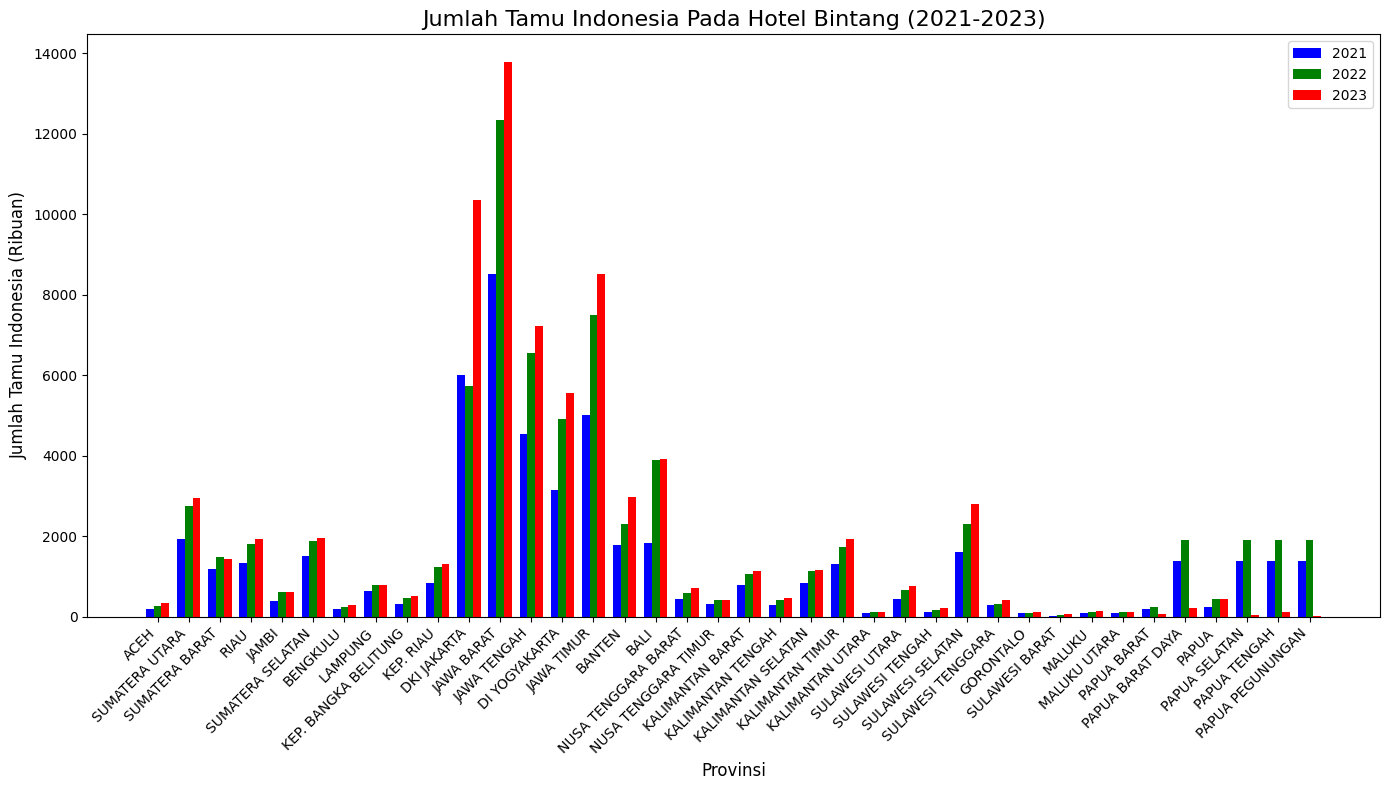

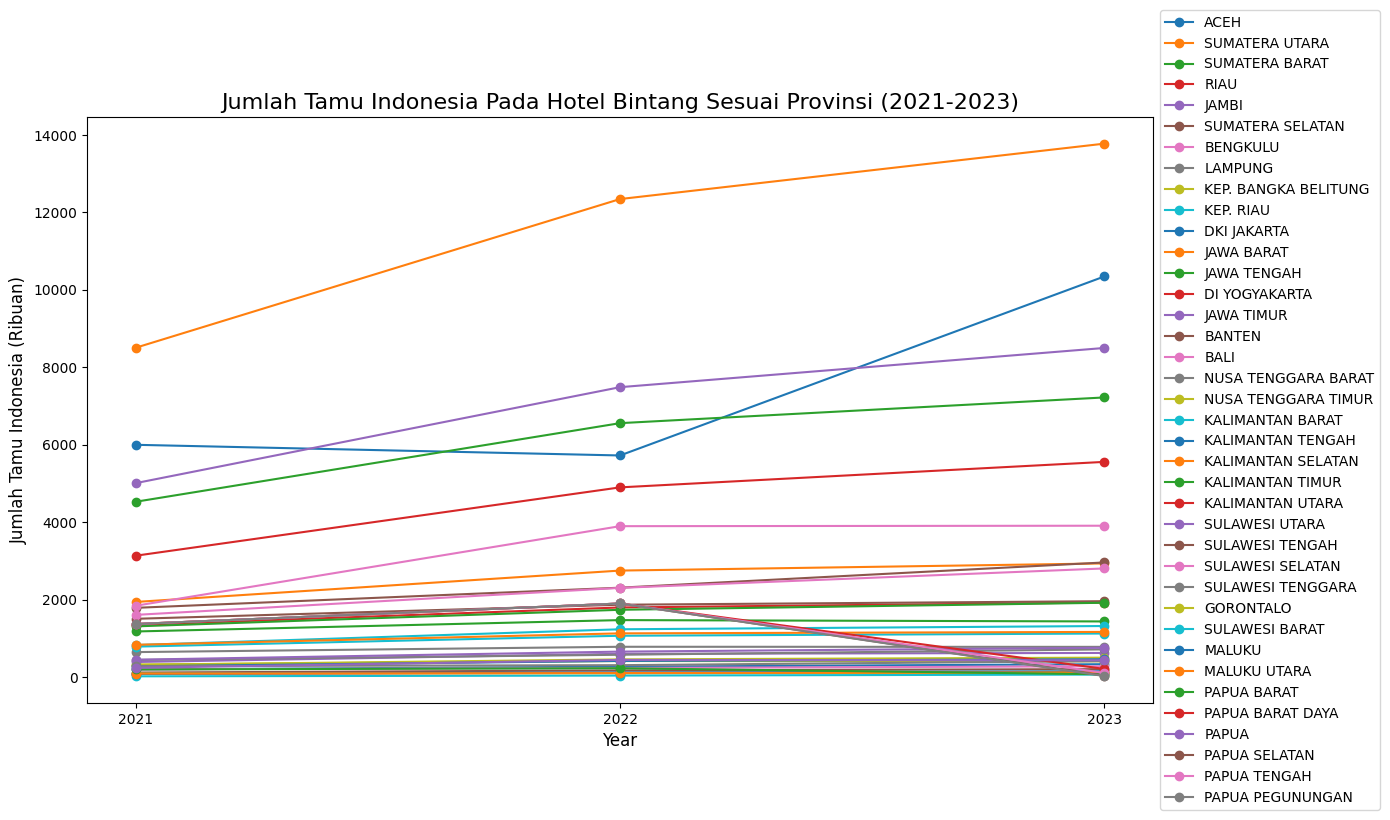

In [20]:
# --------Data TAMU INDONESIA YANG MENGINAP DI HOTEL

plt.figure(figsize=(14, 8))

# Converting the numerical columns to proper data types
data_Jumlah_Tamu_Indonesia_Hotel['2021'] = pd.to_numeric(data_Jumlah_Tamu_Indonesia_Hotel['2021'], errors='coerce')
data_Jumlah_Tamu_Indonesia_Hotel['2022'] = pd.to_numeric(data_Jumlah_Tamu_Indonesia_Hotel['2022'], errors='coerce')
data_Jumlah_Tamu_Indonesia_Hotel['2023'] = pd.to_numeric(data_Jumlah_Tamu_Indonesia_Hotel['2023'], errors='coerce')


bar_width = 0.25
index = np.arange(len(data_Jumlah_Tamu_Indonesia_Hotel))

# Plot bars for each year
plt.bar(index, data_Jumlah_Tamu_Indonesia_Hotel['2021'], bar_width, label='2021', color='b')
plt.bar(index + bar_width, data_Jumlah_Tamu_Indonesia_Hotel['2022'], bar_width, label='2022', color='g')
plt.bar(index + 2 * bar_width, data_Jumlah_Tamu_Indonesia_Hotel['2023'], bar_width, label='2023', color='r')


# Adding labels and title
plt.title('Jumlah Tamu Indonesia Pada Hotel Bintang (2021-2023)', fontsize=16)
plt.xlabel('Provinsi', fontsize=12)
plt.ylabel('Jumlah Tamu Indonesia (Ribuan)', fontsize=12)

# Adding legend
plt.legend()

# Adding province labels to the x-axis
plt.xticks(index + bar_width, data_Jumlah_Tamu_Indonesia_Hotel['Provinsi'], rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

# Plotting the line graph for all provinces
plt.figure(figsize=(14, 8))

# Plot line for each province
for province in data_Jumlah_Tamu_Indonesia_Hotel['Provinsi']:
    province_data = data_Jumlah_Tamu_Indonesia_Hotel[data_Jumlah_Tamu_Indonesia_Hotel['Provinsi'] == province][['2021', '2022', '2023']].values.flatten()
    plt.plot(['2021', '2022', '2023'], province_data, marker='o', linestyle='-', label=province)

# Adding labels and title
plt.title('Jumlah Tamu Indonesia Pada Hotel Bintang Sesuai Provinsi (2021-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Jumlah Tamu Indonesia (Ribuan)', fontsize=12)

# Adding a legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.tight_layout()
plt.show()


**Kesimpulan**

- Berdasarkan grafik yang menampilkan jumlah tamu domestik di hotel berbintang di Indonesia dari tahun 2021 hingga 2023, berikut adalah beberapa kesimpulan per poin:
     - Penurunan dan Kenaikan Jumlah Tamu Secara Keseluruhan: Terjadi peningkatan secara konsisten dari 2021 hingga 2023 di beberapa wilayah utama. Pada beberapa provinsi seperti DKI Jakarta, Jawa Barat, Bali, dan Jawa Timur, jumlah tamu pada tahun 2023 terlihat lebih tinggi dibandingkan dengan tahun 2021 dan 2022. Bali khususnya mengalami lonjakan yang signifikan pada tahun 2023.
     - Provinsi dengan Jumlah Tamu Terbesar: DKI Jakarta, Jawa Barat, dan Bali adalah provinsi dengan jumlah tamu tertinggi pada ketiga tahun (2021, 2022, 2023).
     - Perbandingan Tahun per Tahun: Tahun 2021 (biru) menunjukkan penurunan jumlah tamu di sebagian besar provinsi akibat dampak pandemi COVID-19. Pada 2022 (hijau), terlihat pemulihan dengan peningkatan di beberapa wilayah, dan tren ini berlanjut pada 2023 (merah), mencerminkan pemulihan pariwisata yang semakin kuat.

Kesimpulannya, grafik ini menunjukkan pemulihan yang kuat pada sektor pariwisata dan perhotelan di Indonesia, dengan peningkatan jumlah tamu di banyak provinsi pada tahun 2023.

**2. Data Tamu Asing yang Menginap di Hotel Berbintang 2021-2023**

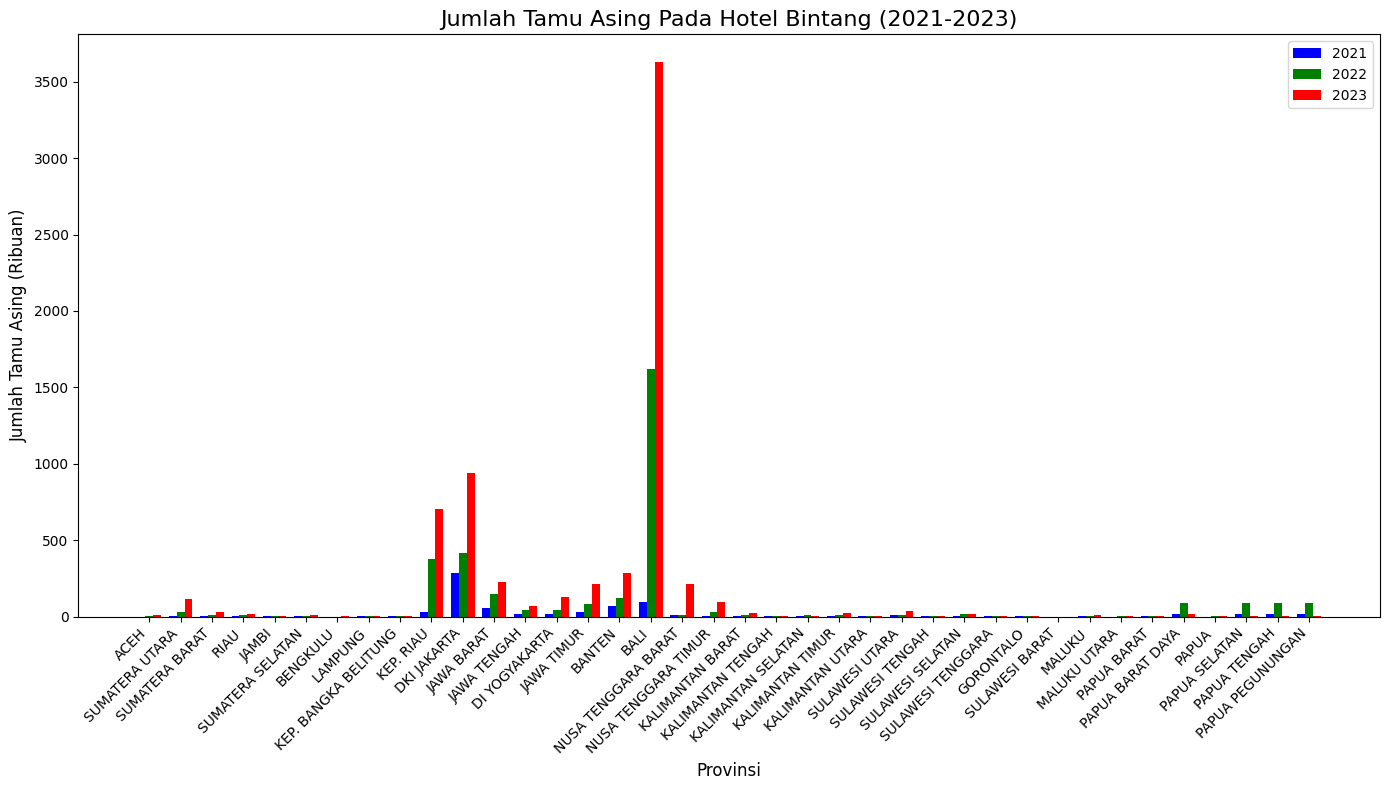

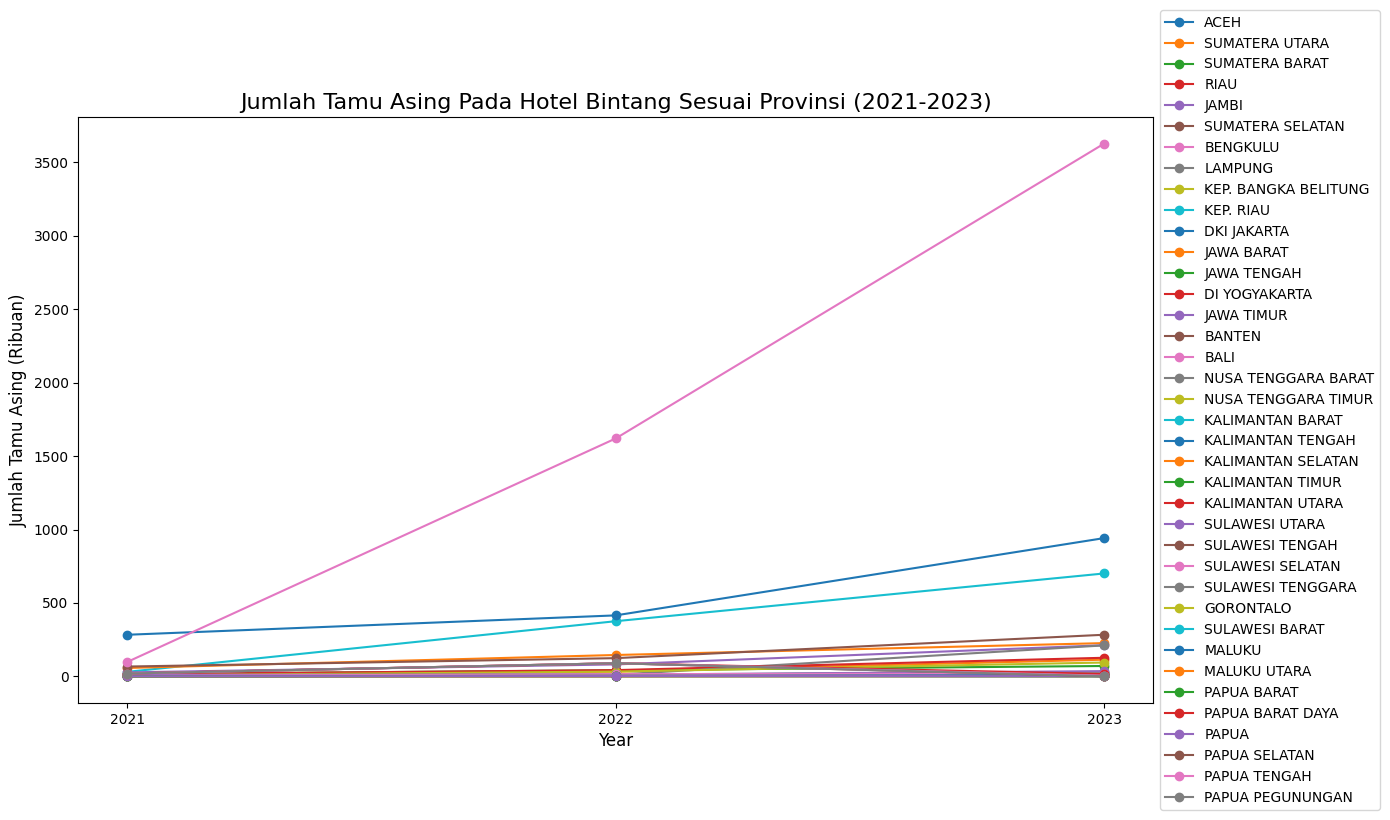

In [21]:
#--------Data TAMU ASING YANG MENGINAP DI HOTEL

plt.figure(figsize=(14, 8))

# # Plot the data for 2021, 2022, and 2023
# data_Jumlah_Tamu_Asing_Hotel.set_index('Provinsi').plot(kind='bar', stacked=False, figsize=(14,8))

# Converting the numerical columns to proper data types
data_Jumlah_Tamu_Asing_Hotel['2021'] = pd.to_numeric(data_Jumlah_Tamu_Asing_Hotel['2021'], errors='coerce')
data_Jumlah_Tamu_Asing_Hotel['2022'] = pd.to_numeric(data_Jumlah_Tamu_Asing_Hotel['2022'], errors='coerce')
data_Jumlah_Tamu_Asing_Hotel['2023'] = pd.to_numeric(data_Jumlah_Tamu_Asing_Hotel['2023'], errors='coerce')


bar_width = 0.25
index = np.arange(len(data_Jumlah_Tamu_Asing_Hotel))

# Plot bars for each year
plt.bar(index, data_Jumlah_Tamu_Asing_Hotel['2021'], bar_width, label='2021', color='b')
plt.bar(index + bar_width, data_Jumlah_Tamu_Asing_Hotel['2022'], bar_width, label='2022', color='g')
plt.bar(index + 2 * bar_width, data_Jumlah_Tamu_Asing_Hotel['2023'], bar_width, label='2023', color='r')


# Adding labels and title
plt.title('Jumlah Tamu Asing Pada Hotel Bintang (2021-2023)', fontsize=16)
plt.xlabel('Provinsi', fontsize=12)
plt.ylabel('Jumlah Tamu Asing (Ribuan)', fontsize=12)

# Adding legend
plt.legend()

# Adding province labels to the x-axis
plt.xticks(index + bar_width, data_Jumlah_Tamu_Asing_Hotel['Provinsi'], rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

# Plotting the line graph for all provinces
plt.figure(figsize=(14, 8))

# Plot line for each province
for province in data_Jumlah_Tamu_Asing_Hotel['Provinsi']:
    province_data = data_Jumlah_Tamu_Asing_Hotel[data_Jumlah_Tamu_Asing_Hotel['Provinsi'] == province][['2021', '2022', '2023']].values.flatten()
    plt.plot(['2021', '2022', '2023'], province_data, marker='o', linestyle='-', label=province)

# Adding labels and title
plt.title('Jumlah Tamu Asing Pada Hotel Bintang Sesuai Provinsi (2021-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Jumlah Tamu Asing (Ribuan)', fontsize=12)

# Adding a legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.tight_layout()
plt.show()  

**Kesimpulan**

- Berdasarkan grafik kedua yang menunjukkan jumlah tamu asing di hotel berbintang di Indonesia dari 2021 hingga 2023, berikut adalah beberapa poin kesimpulan:
     - Pemulihan Signifikan di 2022 dan 2023: Tahun 2022 (hijau) menunjukkan pemulihan, terutama di provinsi seperti Bali, DKI Jakarta, dan Jawa Barat, di mana jumlah tamu asing mulai meningkat kembali.
Pada 2023 (merah), terjadi lonjakan tajam di Bali dengan jumlah tamu asing yang jauh lebih tinggi dibandingkan tahun-tahun sebelumnya, menandakan pemulihan besar pariwisata internasional di wilayah tersebut.
     - Dominasi Bali sebagai Destinasi Utama: Bali tetap menjadi destinasi utama bagi tamu asing, dengan perbedaan yang signifikan dibandingkan provinsi lainnya, khususnya pada 2023, di mana jumlah tamu asing mencapai lebih dari 3.500 ribu.

Kesimpulannya, grafik ini mengindikasikan bahwa pemulihan pariwisata internasional di Indonesia sangat kuat pada tahun 2023, dengan Bali sebagai pusat utama kedatangan tamu asing, diikuti oleh DKI Jakarta dan Jawa Barat.

**3. Data Pengeluaran Wisatawan Mancanegara 2021-2023**

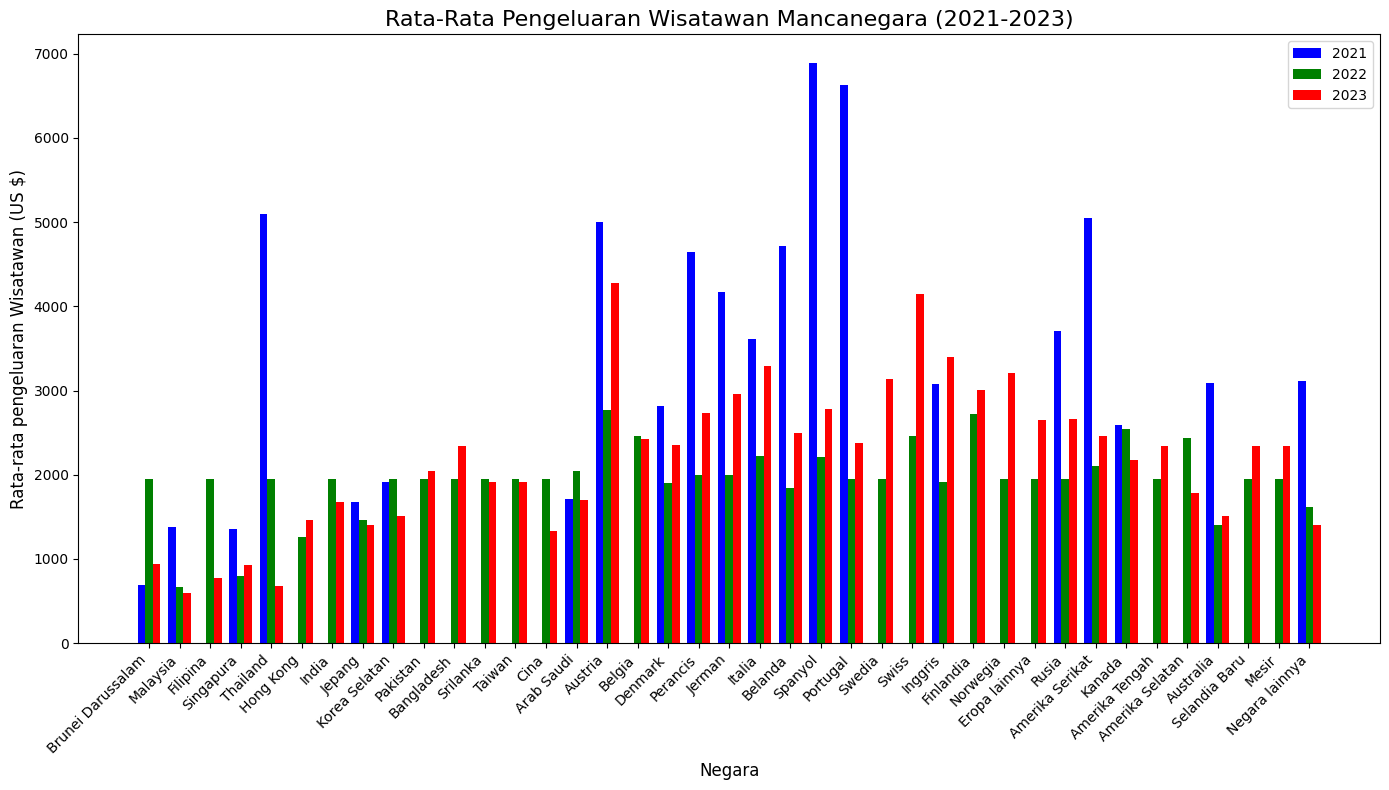

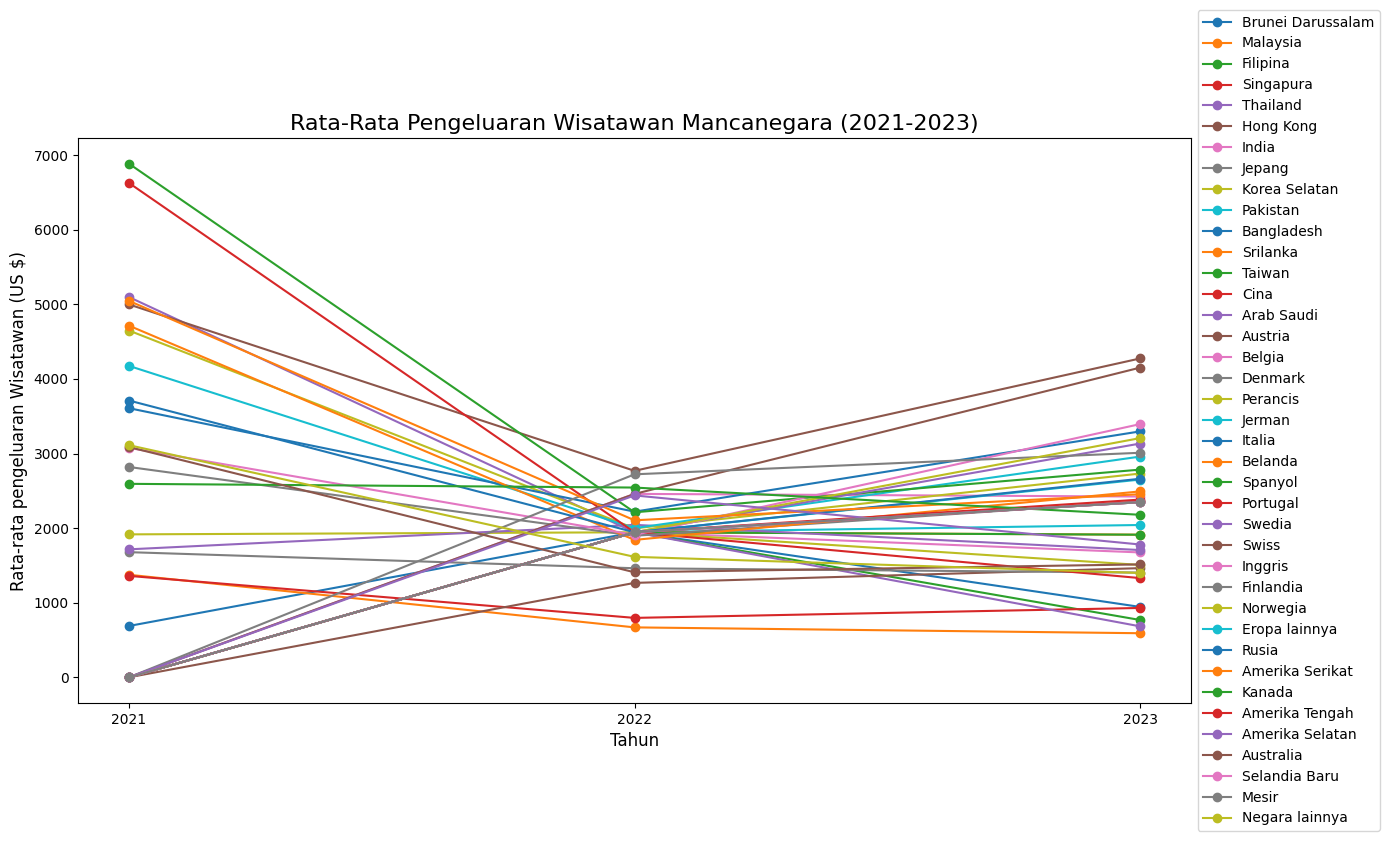

In [22]:
#merge data Rata-rata Pengeluaran Wisatawan
Income_1 = data_Pengeluaran_Wisatawan_1
Income_2 = data_Pengeluaran_Wisatawan_2

rata_rata_merge = pd.merge(Income_1, Income_2, on="Asal Wisatawan")
rata_rata_merge = rata_rata_merge.loc[:, ["Asal Wisatawan", "2021", "2022", "2023"]]
rata_rata_merge.index += 1

plt.figure(figsize=(14, 8))

# Plot the data for 2021, 2022, and 2023

# Converting the numerical columns to proper data types
rata_rata_merge['2021'] = pd.to_numeric(rata_rata_merge['2021'], errors='coerce')
rata_rata_merge['2022'] = pd.to_numeric(rata_rata_merge['2022'], errors='coerce')
rata_rata_merge['2023'] = pd.to_numeric(rata_rata_merge['2023'], errors='coerce')


bar_width = 0.25
index = np.arange(len(rata_rata_merge))

# Plot bars for each year
plt.bar(index, rata_rata_merge['2021'], bar_width, label='2021', color='b')
plt.bar(index + bar_width, rata_rata_merge['2022'], bar_width, label='2022', color='g')
plt.bar(index + 2 * bar_width, rata_rata_merge['2023'], bar_width, label='2023', color='r')


# Adding labels and title
plt.title('Rata-Rata Pengeluaran Wisatawan Mancanegara (2021-2023)', fontsize=16)
plt.xlabel('Negara', fontsize=12)
plt.ylabel('Rata-rata pengeluaran Wisatawan (US $)', fontsize=12)

# Adding legend
plt.legend()

# Adding province labels to the x-axis
plt.xticks(index + bar_width, rata_rata_merge['Asal Wisatawan'], rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

# Plotting the line graph for all provinces
plt.figure(figsize=(14, 8))

# Plot line for each province
for country in rata_rata_merge['Asal Wisatawan']:
    country_data = rata_rata_merge[rata_rata_merge['Asal Wisatawan'] == country][['2021', '2022', '2023']].values.flatten()
    plt.plot(['2021', '2022', '2023'], country_data, marker='o', linestyle='-', label=country)

# Adding labels and title
plt.title('Rata-Rata Pengeluaran Wisatawan Mancanegara (2021-2023)', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Rata-rata pengeluaran Wisatawan (US $)', fontsize=12)

# Adding a legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.tight_layout()
plt.show()

**Kesimpulan**

- Berdasarkan grafik rata-rata pengeluaran wisatawan mancanegara per negara dari 2021 hingga 2023, berikut adalah beberapa kesimpulan::
     - Negara-Negara dengan Pengeluaran Tertinggi: Wisatawan dari Amerika Serikat, Inggris, dan Rusia tampaknya tetap menjadi yang paling tinggi dalam hal pengeluaran pada ketiga tahun tersebut. Pada 2023, beberapa negara Eropa lainnya seperti Prancis dan Italia juga mengalami peningkatan pengeluaran yang cukup signifikan.
     - Penurunan Pengeluaran pada 2022 (Hijau): Pada tahun 2022, pengeluaran rata-rata per wisatawan dari beberapa negara seperti Amerika Serikat dan Rusia tampak menurun. Hal ini mungkin disebabkan oleh pengurangan pembatasan perjalanan yang meningkatkan volume wisatawan, namun pengeluaran per wisatawan lebih rendah.
     - Peningkatan Pengeluaran pada 2023 (Merah): Di banyak negara seperti Jepang, Korea Selatan, dan Australia, pengeluaran wisatawan pada tahun 2023 menunjukkan peningkatan signifikan. Ini menunjukkan bahwa pariwisata mulai pulih dengan lebih banyak wisatawan kembali melakukan perjalanan, dan pengeluaran per wisatawan juga meningkat.


Secara keseluruhan, grafik ini menunjukkan bahwa meskipun pengeluaran wisatawan sempat menurun pada 2022, tahun 2023 menandakan pemulihan yang kuat dengan peningkatan pengeluaran di berbagai negara.

**4. Data Lama Tinggal Wisatawan Mancanegara 2021-2023**

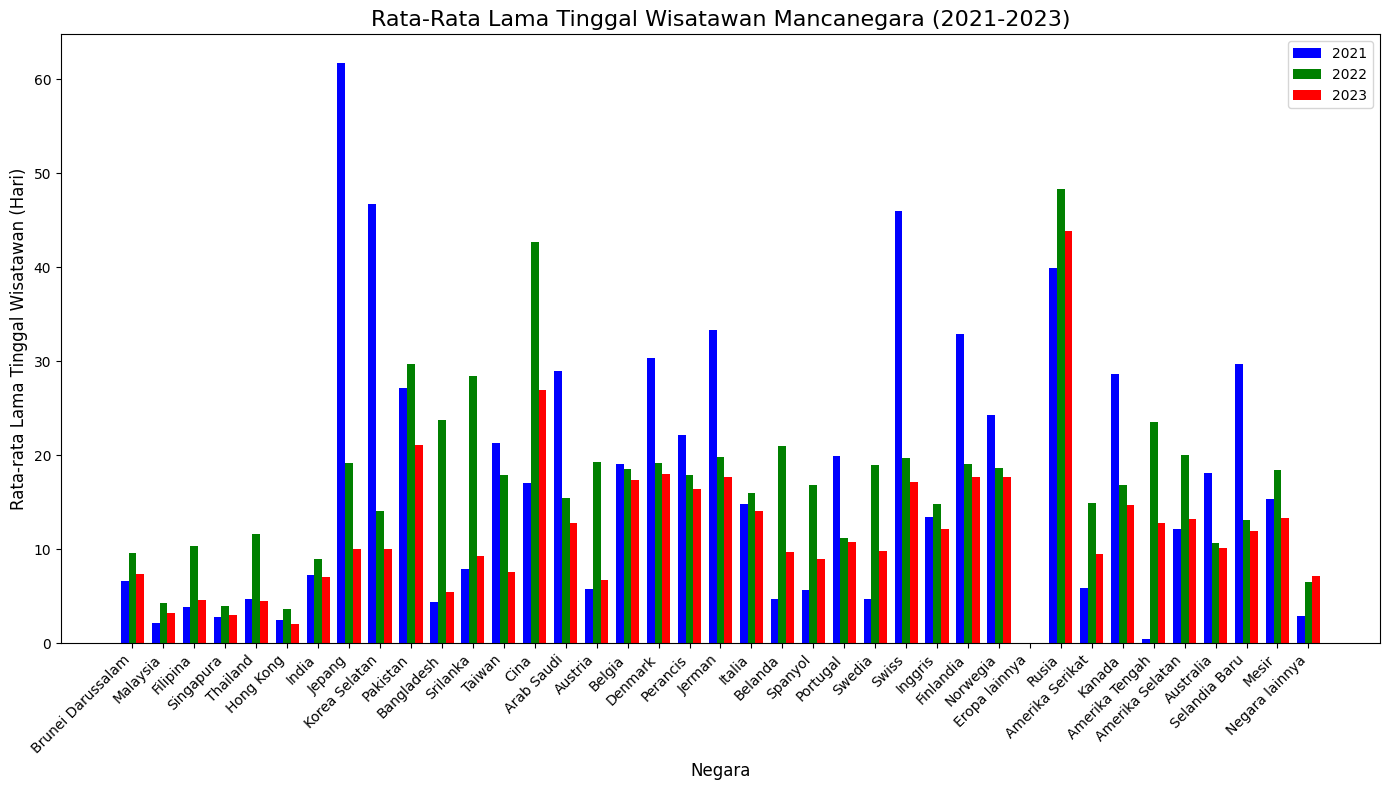

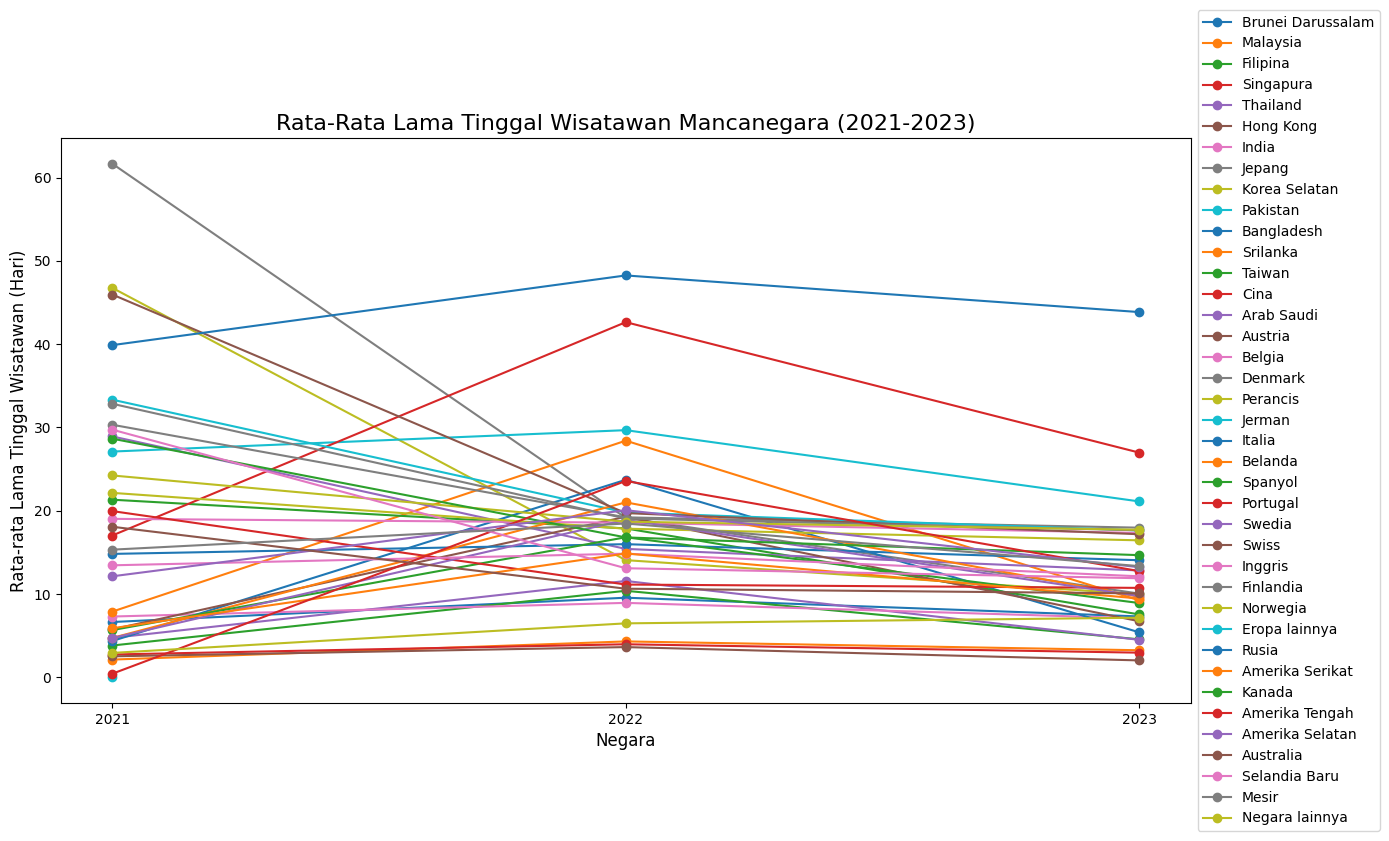

In [23]:
#merge data rata rata wisatawan tinggal
avg_live1 = data_Lama_Tinggal_Wisatawan_Mancanegara_1
avg_live2 = data_Lama_Tinggal_Wisatawan_Mancanegara_2

avg_merge = pd.merge(avg_live1, avg_live2, on="Asal Wisatawan")
avg_merge = avg_merge.loc[:, ["Asal Wisatawan", "2021", "2022", "2023"]]
avg_merge.index += 1

plt.figure(figsize=(14, 8))

# Plot the data for 2021, 2022, and 2023

# Converting the numerical columns to proper data types
avg_merge['2021'] = pd.to_numeric(avg_merge['2021'], errors='coerce')
avg_merge['2022'] = pd.to_numeric(avg_merge['2022'], errors='coerce')
avg_merge['2023'] = pd.to_numeric(avg_merge['2023'], errors='coerce')


bar_width = 0.25
index = np.arange(len(avg_merge))

# Plot bars for each year
plt.bar(index, avg_merge['2021'], bar_width, label='2021', color='b')
plt.bar(index + bar_width, avg_merge['2022'], bar_width, label='2022', color='g')
plt.bar(index + 2 * bar_width, avg_merge['2023'], bar_width, label='2023', color='r')


# Adding labels and title
plt.title('Rata-Rata Lama Tinggal Wisatawan Mancanegara (2021-2023)', fontsize=16)
plt.xlabel('Negara', fontsize=12)
plt.ylabel('Rata-rata Lama Tinggal Wisatawan (Hari)', fontsize=12)

# Adding legend
plt.legend()

# Adding province labels to the x-axis
plt.xticks(index + bar_width, avg_merge['Asal Wisatawan'], rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

# Plotting the line graph for all provinces
plt.figure(figsize=(14, 8))

# Plot line for each province
for country in avg_merge['Asal Wisatawan']:
    country_data = avg_merge[avg_merge['Asal Wisatawan'] == country][['2021', '2022', '2023']].values.flatten()
    plt.plot(['2021', '2022', '2023'], country_data, marker='o', linestyle='-', label=country)

# Adding labels and title
plt.title('Rata-Rata Lama Tinggal Wisatawan Mancanegara (2021-2023)', fontsize=16)
plt.xlabel('Negara', fontsize=12)
plt.ylabel('Rata-rata Lama Tinggal Wisatawan (Hari)', fontsize=12)

# Adding a legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.tight_layout()
plt.show()

**Kesimpulan**

- Berdasarkan data pengeluaran rata-rata, wisatawan dari Spanyol dan Portugal menghabiskan uang paling banyak, namun waktu tinggal mereka di Indonesia relatif singkat. Hal ini menunjukkan bahwa mereka cenderung fokus pada satu lokasi untuk tujuan rekreasi. Sementara itu, wisatawan Jepang, meskipun pengeluarannya tidak sebesar negara lain, memiliki durasi tinggal yang lebih lama. Ini menunjukkan bahwa orang Jepang mungkin lebih nyaman menetap di Indonesia, bukan hanya sebagai turis, tetapi juga sebagai penduduk atau pekerja.

**5. Data Akomodasi, Kamar, dan Tempat Tidur pada Hotel Bintang 2021-2023**

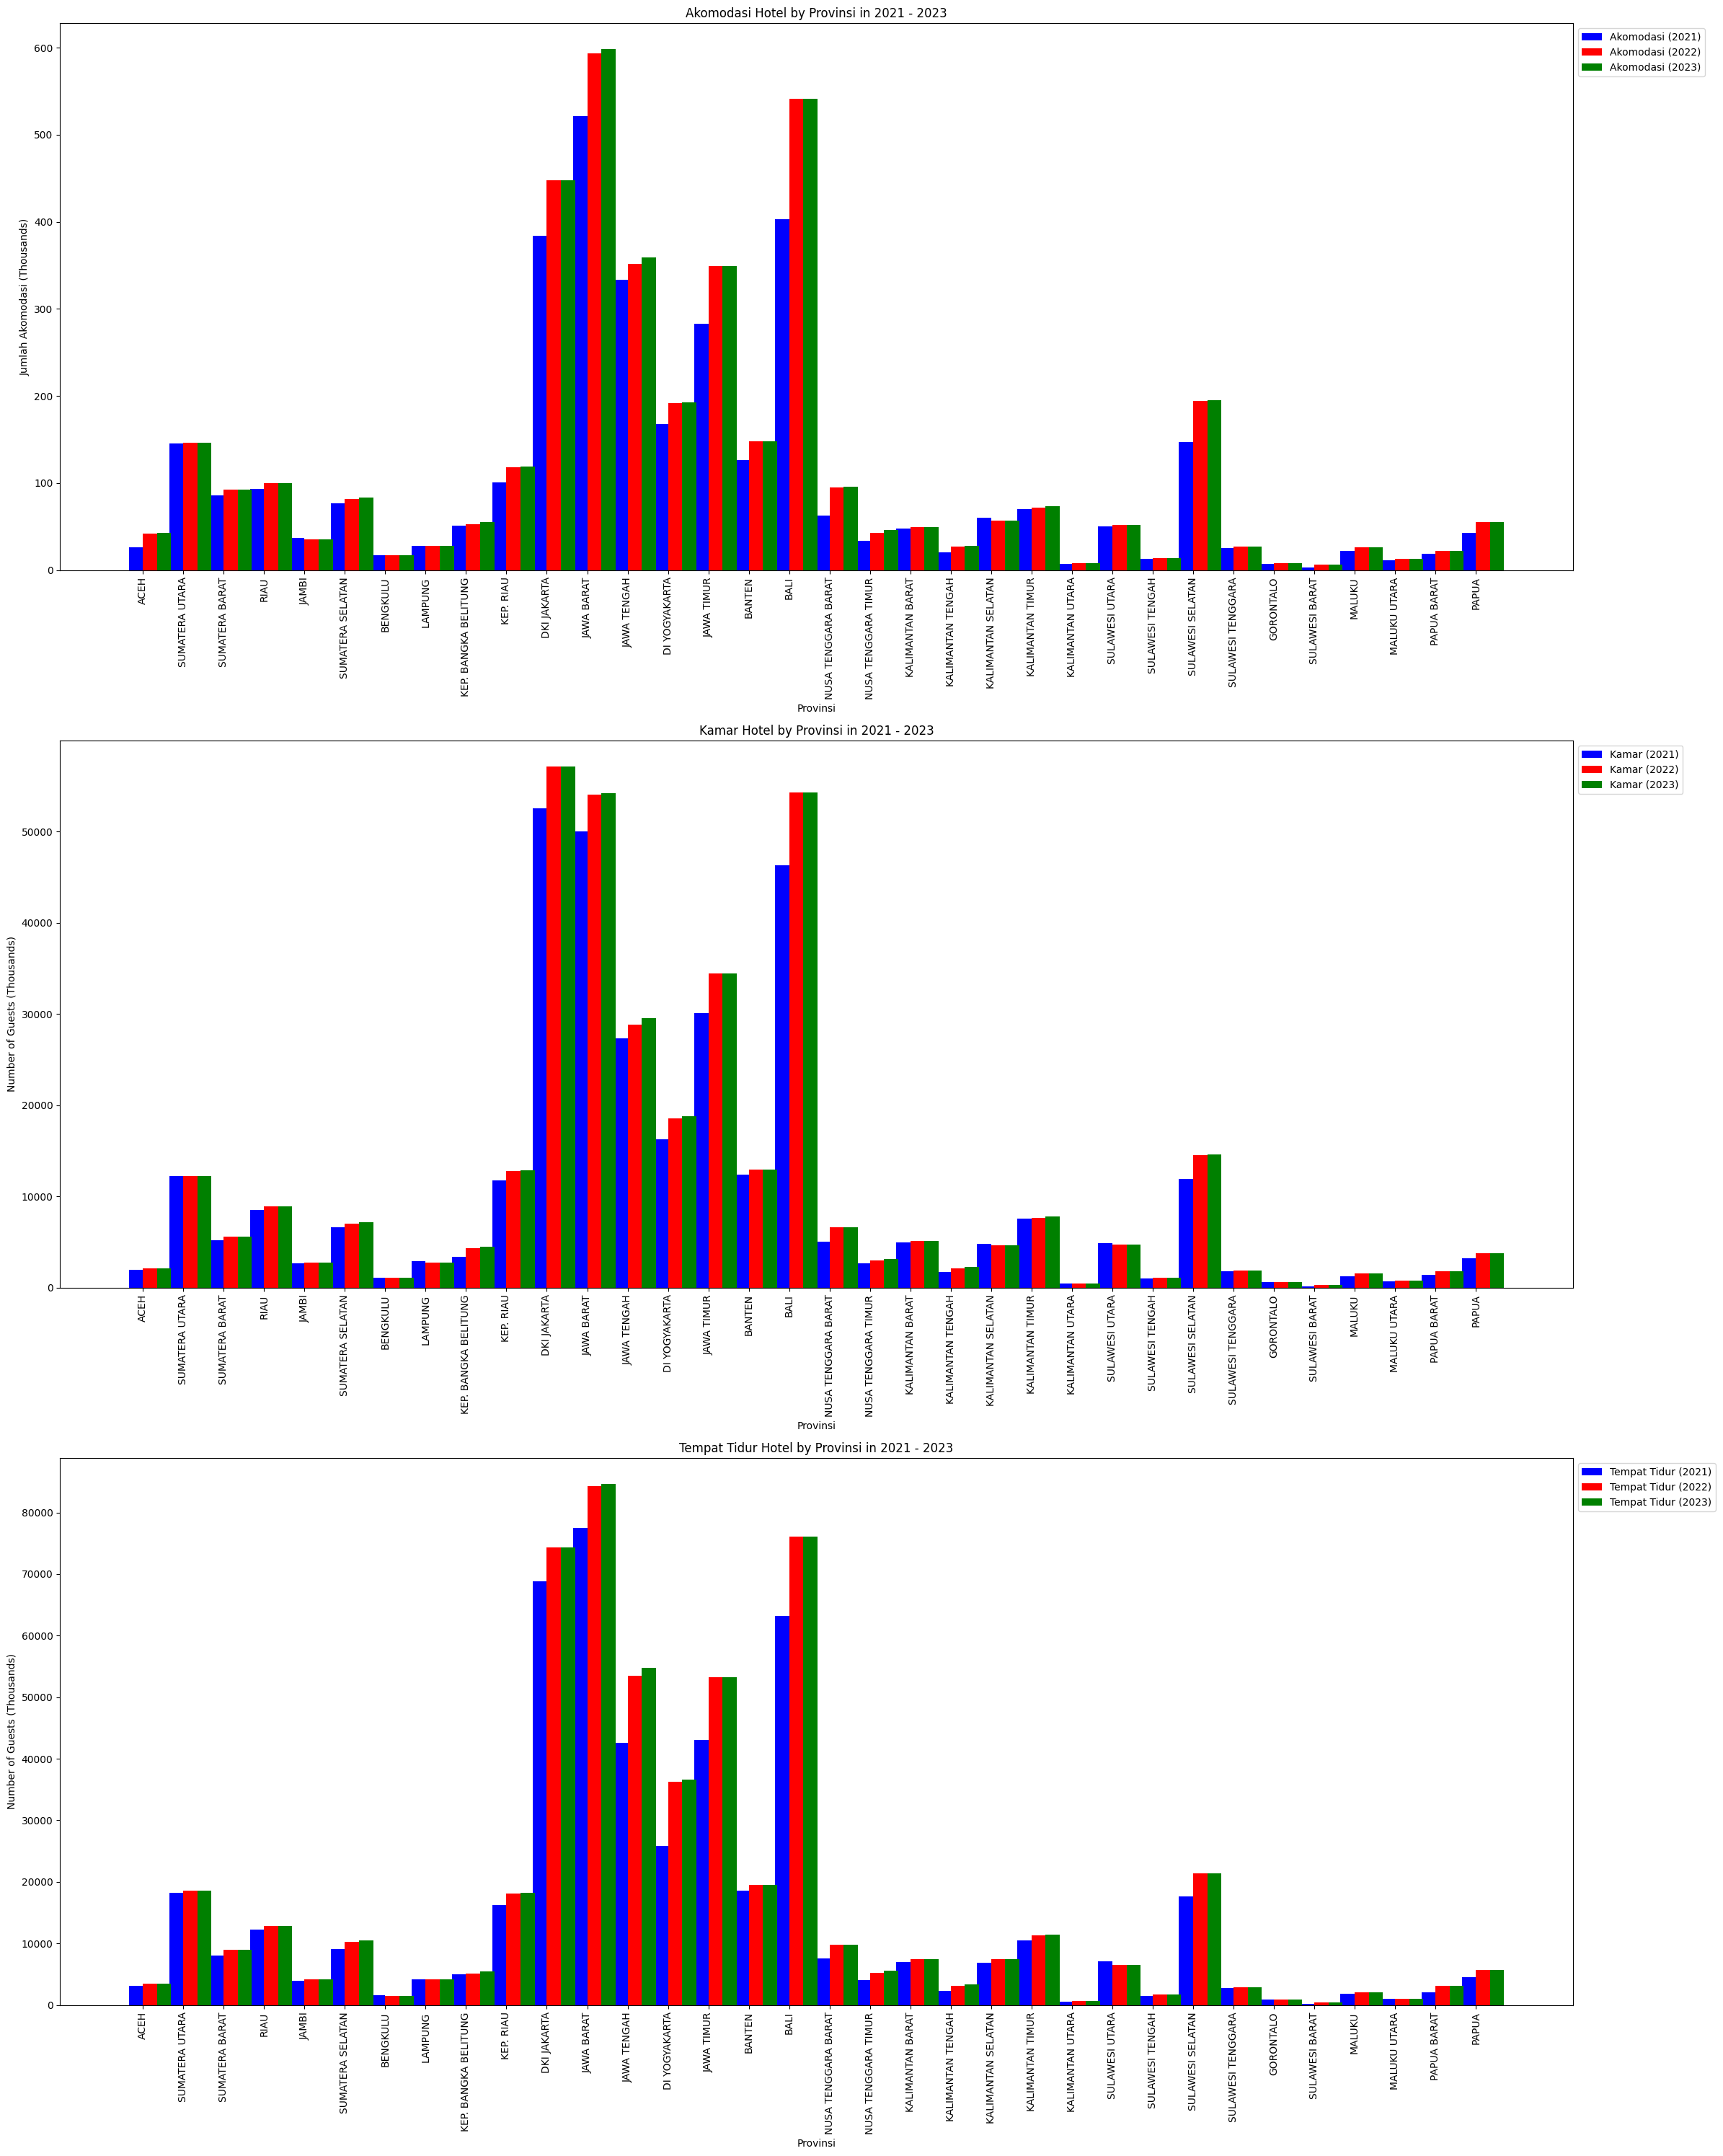

In [24]:
#Merge tahun akomodasi hotel
acomodate_1 = data_Akomodasi_Hotel_1
acomodate_2 = data_Akomodasi_Hotel_2
aco_merged = pd.merge(acomodate_1, acomodate_2, on='Provinsi')
aco_merged.index += 1

# aco_merged = aco_merged.drop(['Akomodasi 2019', 'Akomodasi 2020', 'Kamar 2019', 'Kamar 2020', 'Tempat Tidur 2019', 'Tempat Tidur 2020'], axis=1)
aco_merged = aco_merged.loc[:, ['Provinsi', 'Akomodasi 2021', 'Akomodasi 2022', 'Akomodasi 2023', 
                                'Kamar 2021', 'Kamar 2022', 'Kamar 2023', 
                                'Tempat Tidur 2021', 'Tempat Tidur 2022', 'Tempat Tidur 2023']]

numeric_col = ['Akomodasi 2021', 'Akomodasi 2022', 'Akomodasi 2023', 
                                'Kamar 2021', 'Kamar 2022', 'Kamar 2023', 
                                'Tempat Tidur 2021', 'Tempat Tidur 2022', 'Tempat Tidur 2023']

aco_merged[numeric_col] = aco_merged[numeric_col].apply(pd.to_numeric)

fig, ax = plt.subplots(3, 1, figsize=(24, 30))

# Bar chart: Indonesian vs Foreign guests by Province for 2023
bar_width = 0.35
index = range(len(aco_merged))

ax[0].bar(index, aco_merged['Akomodasi 2021'], bar_width, label='Akomodasi (2021)', color='blue')
ax[0].bar([i + bar_width for i in index], aco_merged['Akomodasi 2022'], bar_width, label='Akomodasi (2022)', color='red')
ax[0].bar([i + 2 * bar_width for i in index], aco_merged['Akomodasi 2023'], bar_width, label='Akomodasi (2023)', color='green')

ax[0].set_title('Akomodasi Hotel by Provinsi in 2021 - 2023')
ax[0].set_xlabel('Provinsi')
ax[0].set_ylabel('Jumlah Akomodasi (Thousands)')
ax[0].set_xticks([i + bar_width / 2 for i in index])
ax[0].set_xticklabels(aco_merged['Provinsi'], rotation=90)
ax[0].legend()

ax[1].bar(index, aco_merged['Kamar 2021'], bar_width, label='Kamar (2021)', color='blue')
ax[1].bar([i + bar_width for i in index], aco_merged['Kamar 2022'], bar_width, label='Kamar (2022)', color='red')
ax[1].bar([i + 2 * bar_width for i in index], aco_merged['Kamar 2023'], bar_width, label='Kamar (2023)', color='green')

ax[1].set_title('Kamar Hotel by Provinsi in 2021 - 2023')
ax[1].set_xlabel('Provinsi')
ax[1].set_ylabel('Number of Guests (Thousands)')
ax[1].set_xticks([i + bar_width / 2 for i in index])
ax[1].set_xticklabels(aco_merged['Provinsi'], rotation=90)
ax[1].legend()

ax[2].bar(index, aco_merged['Tempat Tidur 2021'], bar_width, label='Tempat Tidur (2021)', color='blue')
ax[2].bar([i + bar_width for i in index], aco_merged['Tempat Tidur 2022'], bar_width, label='Tempat Tidur (2022)', color='red')
ax[2].bar([i + 2 * bar_width for i in index], aco_merged['Tempat Tidur 2023'], bar_width, label='Tempat Tidur (2023)', color='green')

ax[2].set_title('Tempat Tidur Hotel by Provinsi in 2021 - 2023')
ax[2].set_xlabel('Provinsi')
ax[2].set_ylabel('Number of Guests (Thousands)')
ax[2].set_xticks([i + bar_width / 2 for i in index])
ax[2].set_xticklabels(aco_merged['Provinsi'], rotation=90)
ax[2].legend()

ax[0].legend(loc='upper left', bbox_to_anchor=(1, 1))
ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
ax[2].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


**Kesimpulan**

- Berdasarkan data yang ada, hampir semua kategori, termasuk akomodasi, kamar hotel, dan tempat tidur, menunjukkan bahwa tahun 2023 memiliki angka tertinggi dibandingkan tahun 2021 dan 2022. Akomodasi hotel paling banyak ditempati di provinsi Jawa Barat dan Bali. Untuk kamar hotel, DKI Jakarta, Jawa Barat, dan Bali menjadi provinsi dengan tingkat hunian tertinggi. Sementara itu, tempat tidur hotel juga paling banyak digunakan di Jawa Barat dan Bali. Kesimpulannya, provinsi yang paling banyak ditempati adalah Bali, Jawa Barat, dan DKI Jakarta.

**6. Data Jumlah Wisatawan Asing vs Lokal Per-Provinsi 2021-2023**

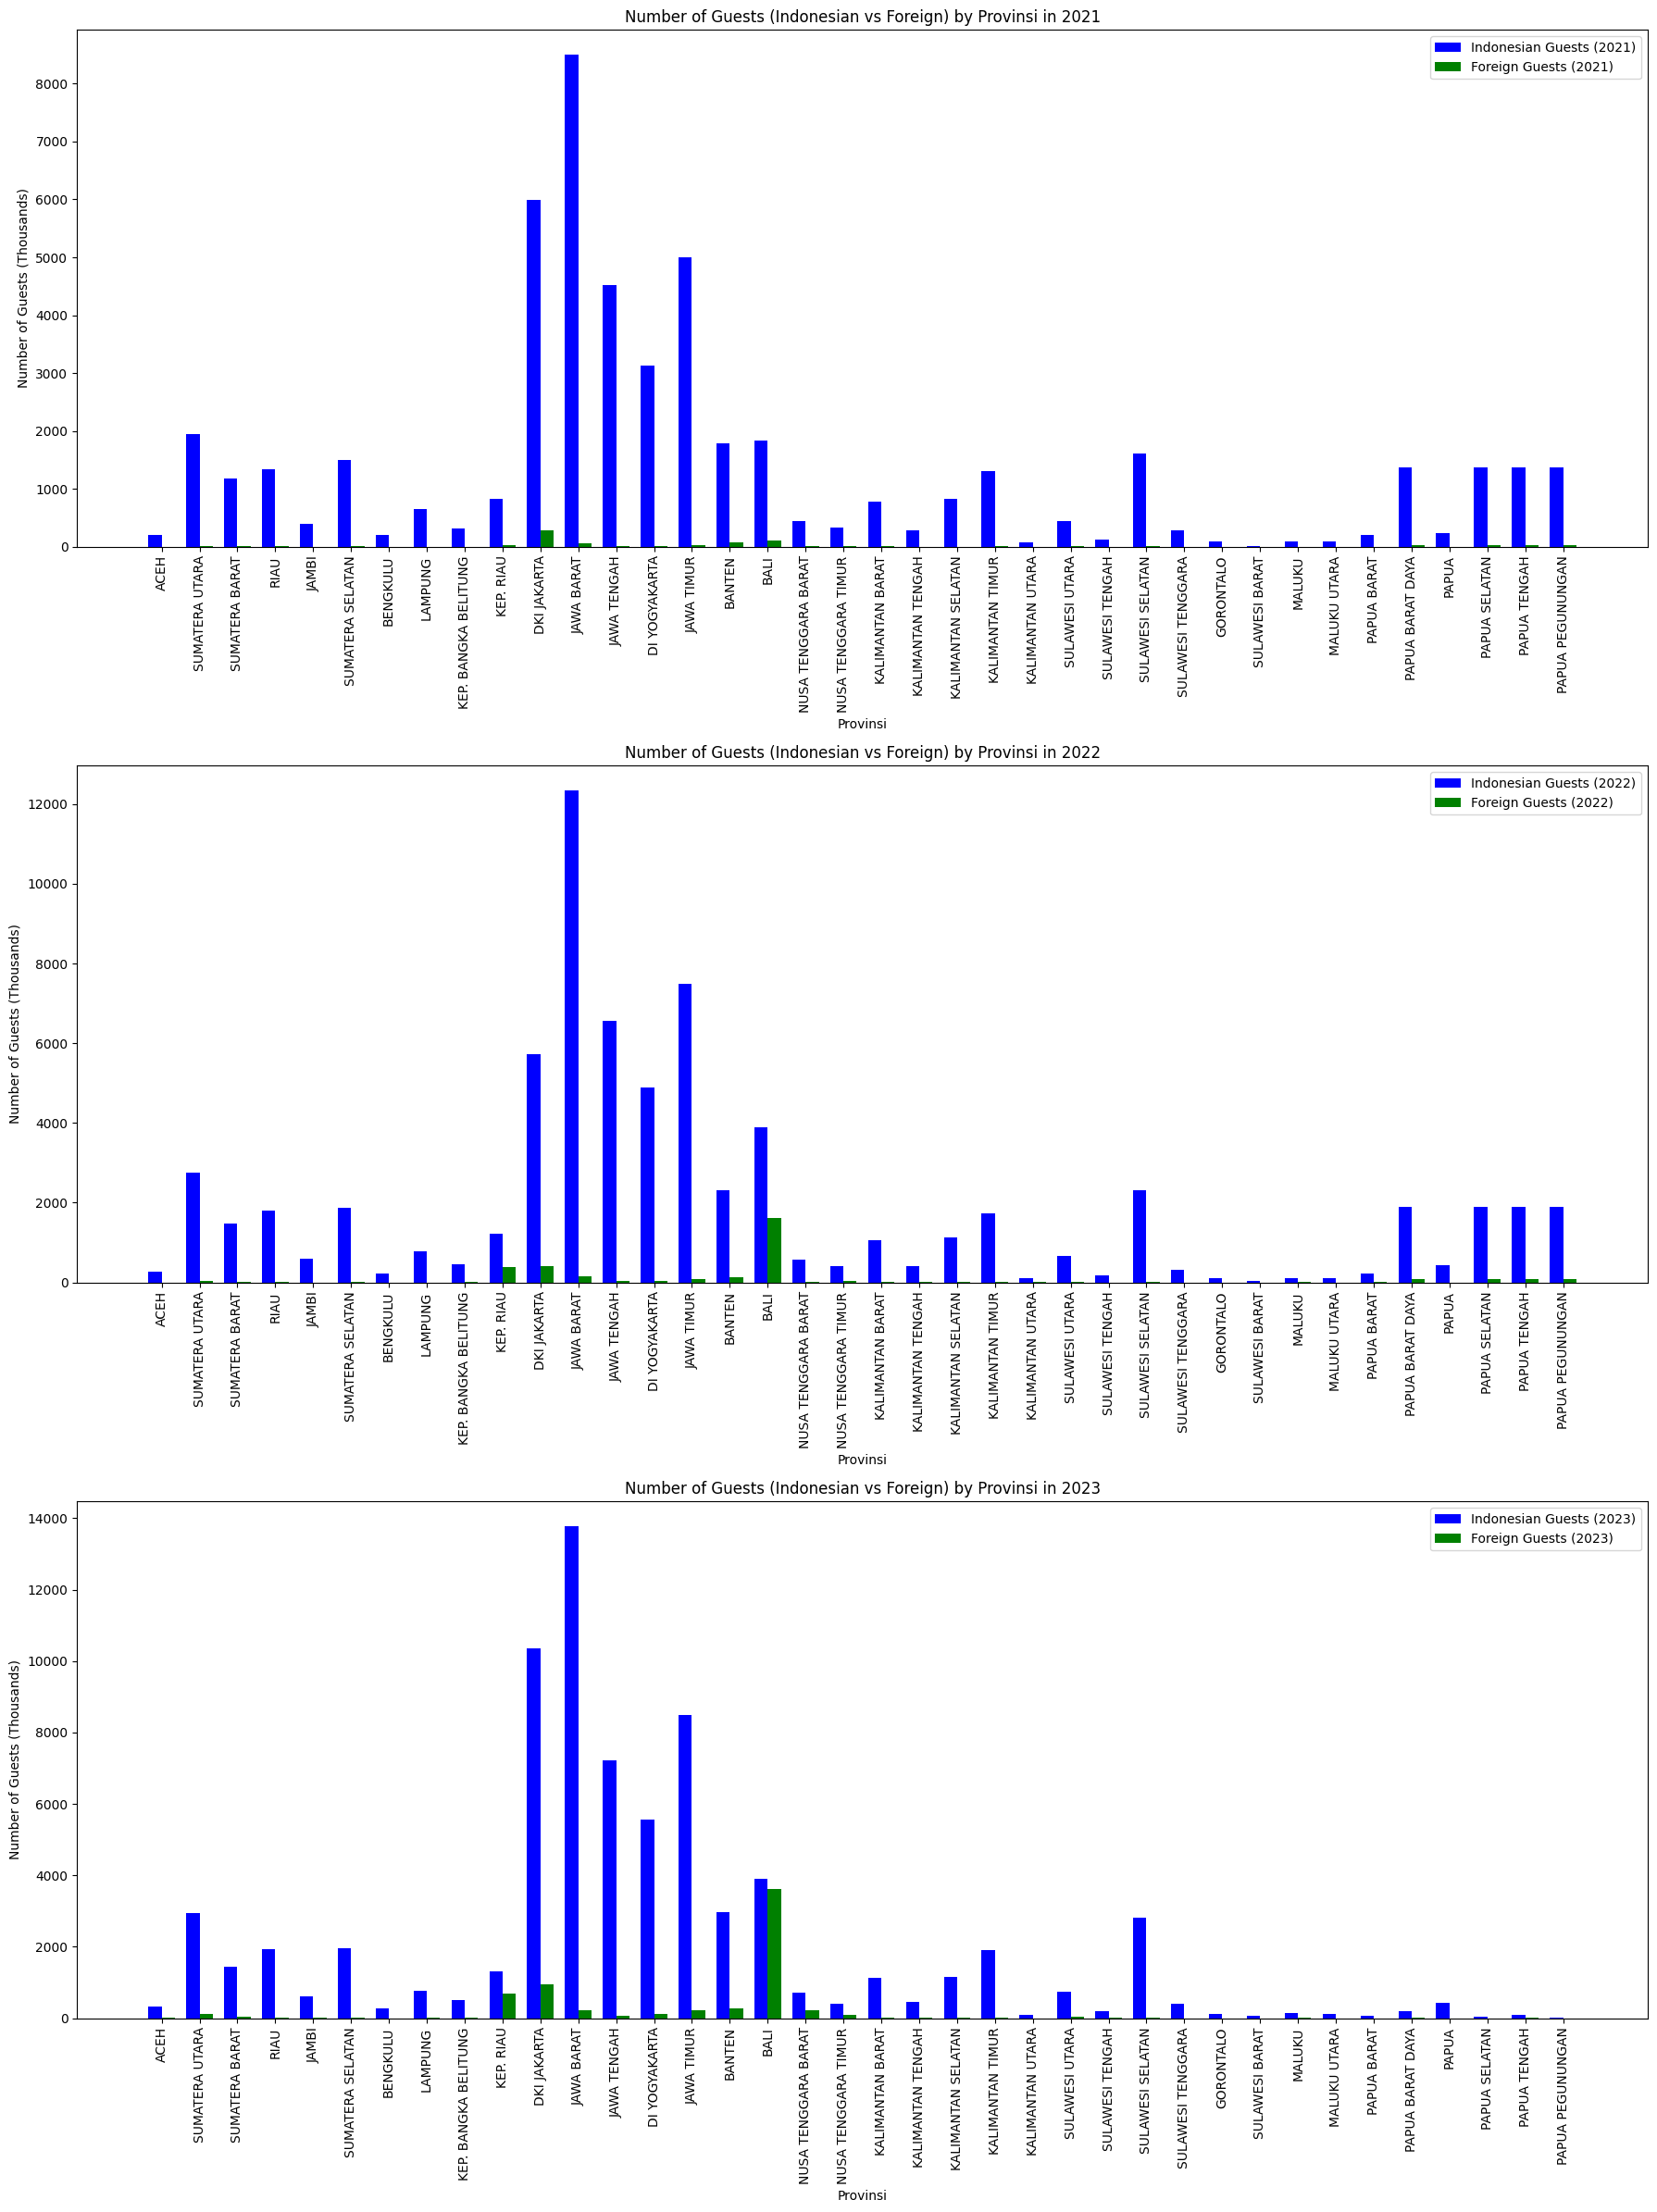

In [25]:
# merge tamu indonesia dan asing
temp_indo = data_Jumlah_Tamu_Indonesia_Hotel
temp_asing = data_Jumlah_Tamu_Asing_Hotel

# Clean and structure the Indonesian guests dataset
temp_indo.columns = ['Provinsi', '2021_indo', '2022_indo', '2023_indo']
# temp_indo = temp_indo.drop([0, 1, 40])  # Remove unnecessary rows
temp_indo.reset_index(drop=True, inplace=True)

# Clean and structure the foreign guests dataset
temp_asing.columns = ['Provinsi', '2021_foreign', '2022_foreign', '2023_foreign']
# temp_asing = temp_asing.drop([0, 1, 40])  # Remove unnecessary rows
temp_asing.reset_index(drop=True, inplace=True)


merged_df = pd.merge(temp_indo, temp_asing, on='Provinsi')

# Convert numeric columns to floats
numeric_cols = ['2021_indo', '2022_indo', '2023_indo', '2021_foreign', '2022_foreign', '2023_foreign']
merged_df[numeric_cols] = merged_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

fig, ax = plt.subplots(3, 1, figsize=(18, 24))

# Bar chart: Indonesian vs Foreign guests by Province for 2023
bar_width = 0.35
index = range(len(merged_df))

ax[0].bar(index, merged_df['2021_indo'], bar_width, label='Indonesian Guests (2021)', color='blue')
ax[0].bar([i + bar_width for i in index], merged_df['2021_foreign'], bar_width, label='Foreign Guests (2021)', color='green')

ax[0].set_title('Number of Guests (Indonesian vs Foreign) by Provinsi in 2021')
ax[0].set_xlabel('Provinsi')
ax[0].set_ylabel('Number of Guests (Thousands)')
ax[0].set_xticks([i + bar_width / 2 for i in index])
ax[0].set_xticklabels(merged_df['Provinsi'], rotation=90)
ax[0].legend()

ax[1].bar(index, merged_df['2022_indo'], bar_width, label='Indonesian Guests (2022)', color='blue')
ax[1].bar([i + bar_width for i in index], merged_df['2022_foreign'], bar_width, label='Foreign Guests (2022)', color='green')

ax[1].set_title('Number of Guests (Indonesian vs Foreign) by Provinsi in 2022')
ax[1].set_xlabel('Provinsi')
ax[1].set_ylabel('Number of Guests (Thousands)')
ax[1].set_xticks([i + bar_width / 2 for i in index])
ax[1].set_xticklabels(merged_df['Provinsi'], rotation=90)
ax[1].legend()

ax[2].bar(index, merged_df['2023_indo'], bar_width, label='Indonesian Guests (2023)', color='blue')
ax[2].bar([i + bar_width for i in index], merged_df['2023_foreign'], bar_width, label='Foreign Guests (2023)', color='green')

ax[2].set_title('Number of Guests (Indonesian vs Foreign) by Provinsi in 2023')
ax[2].set_xlabel('Provinsi')
ax[2].set_ylabel('Number of Guests (Thousands)')
ax[2].set_xticks([i + bar_width / 2 for i in index])
ax[2].set_xticklabels(merged_df['Provinsi'], rotation=90)
ax[2].legend()

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


**Kesimpulan**

- Berdasarkan data, sebagian besar wisatawan domestik rata-rata mengunjungi provinsi Jawa Barat, diikuti oleh DKI Jakarta dan Jawa Timur. Sementara itu, untuk wisatawan mancanegara, provinsi dengan kunjungan tertinggi adalah Bali, diikuti oleh DKI Jakarta. Kesimpulannya, grafik menunjukkan bahwa jumlah wisatawan domestik lebih banyak dibandingkan dengan wisatawan asing.

**7. Data Lama Menginap Tamu Asing vs Lokal Per-Provinsi 2021-2023**

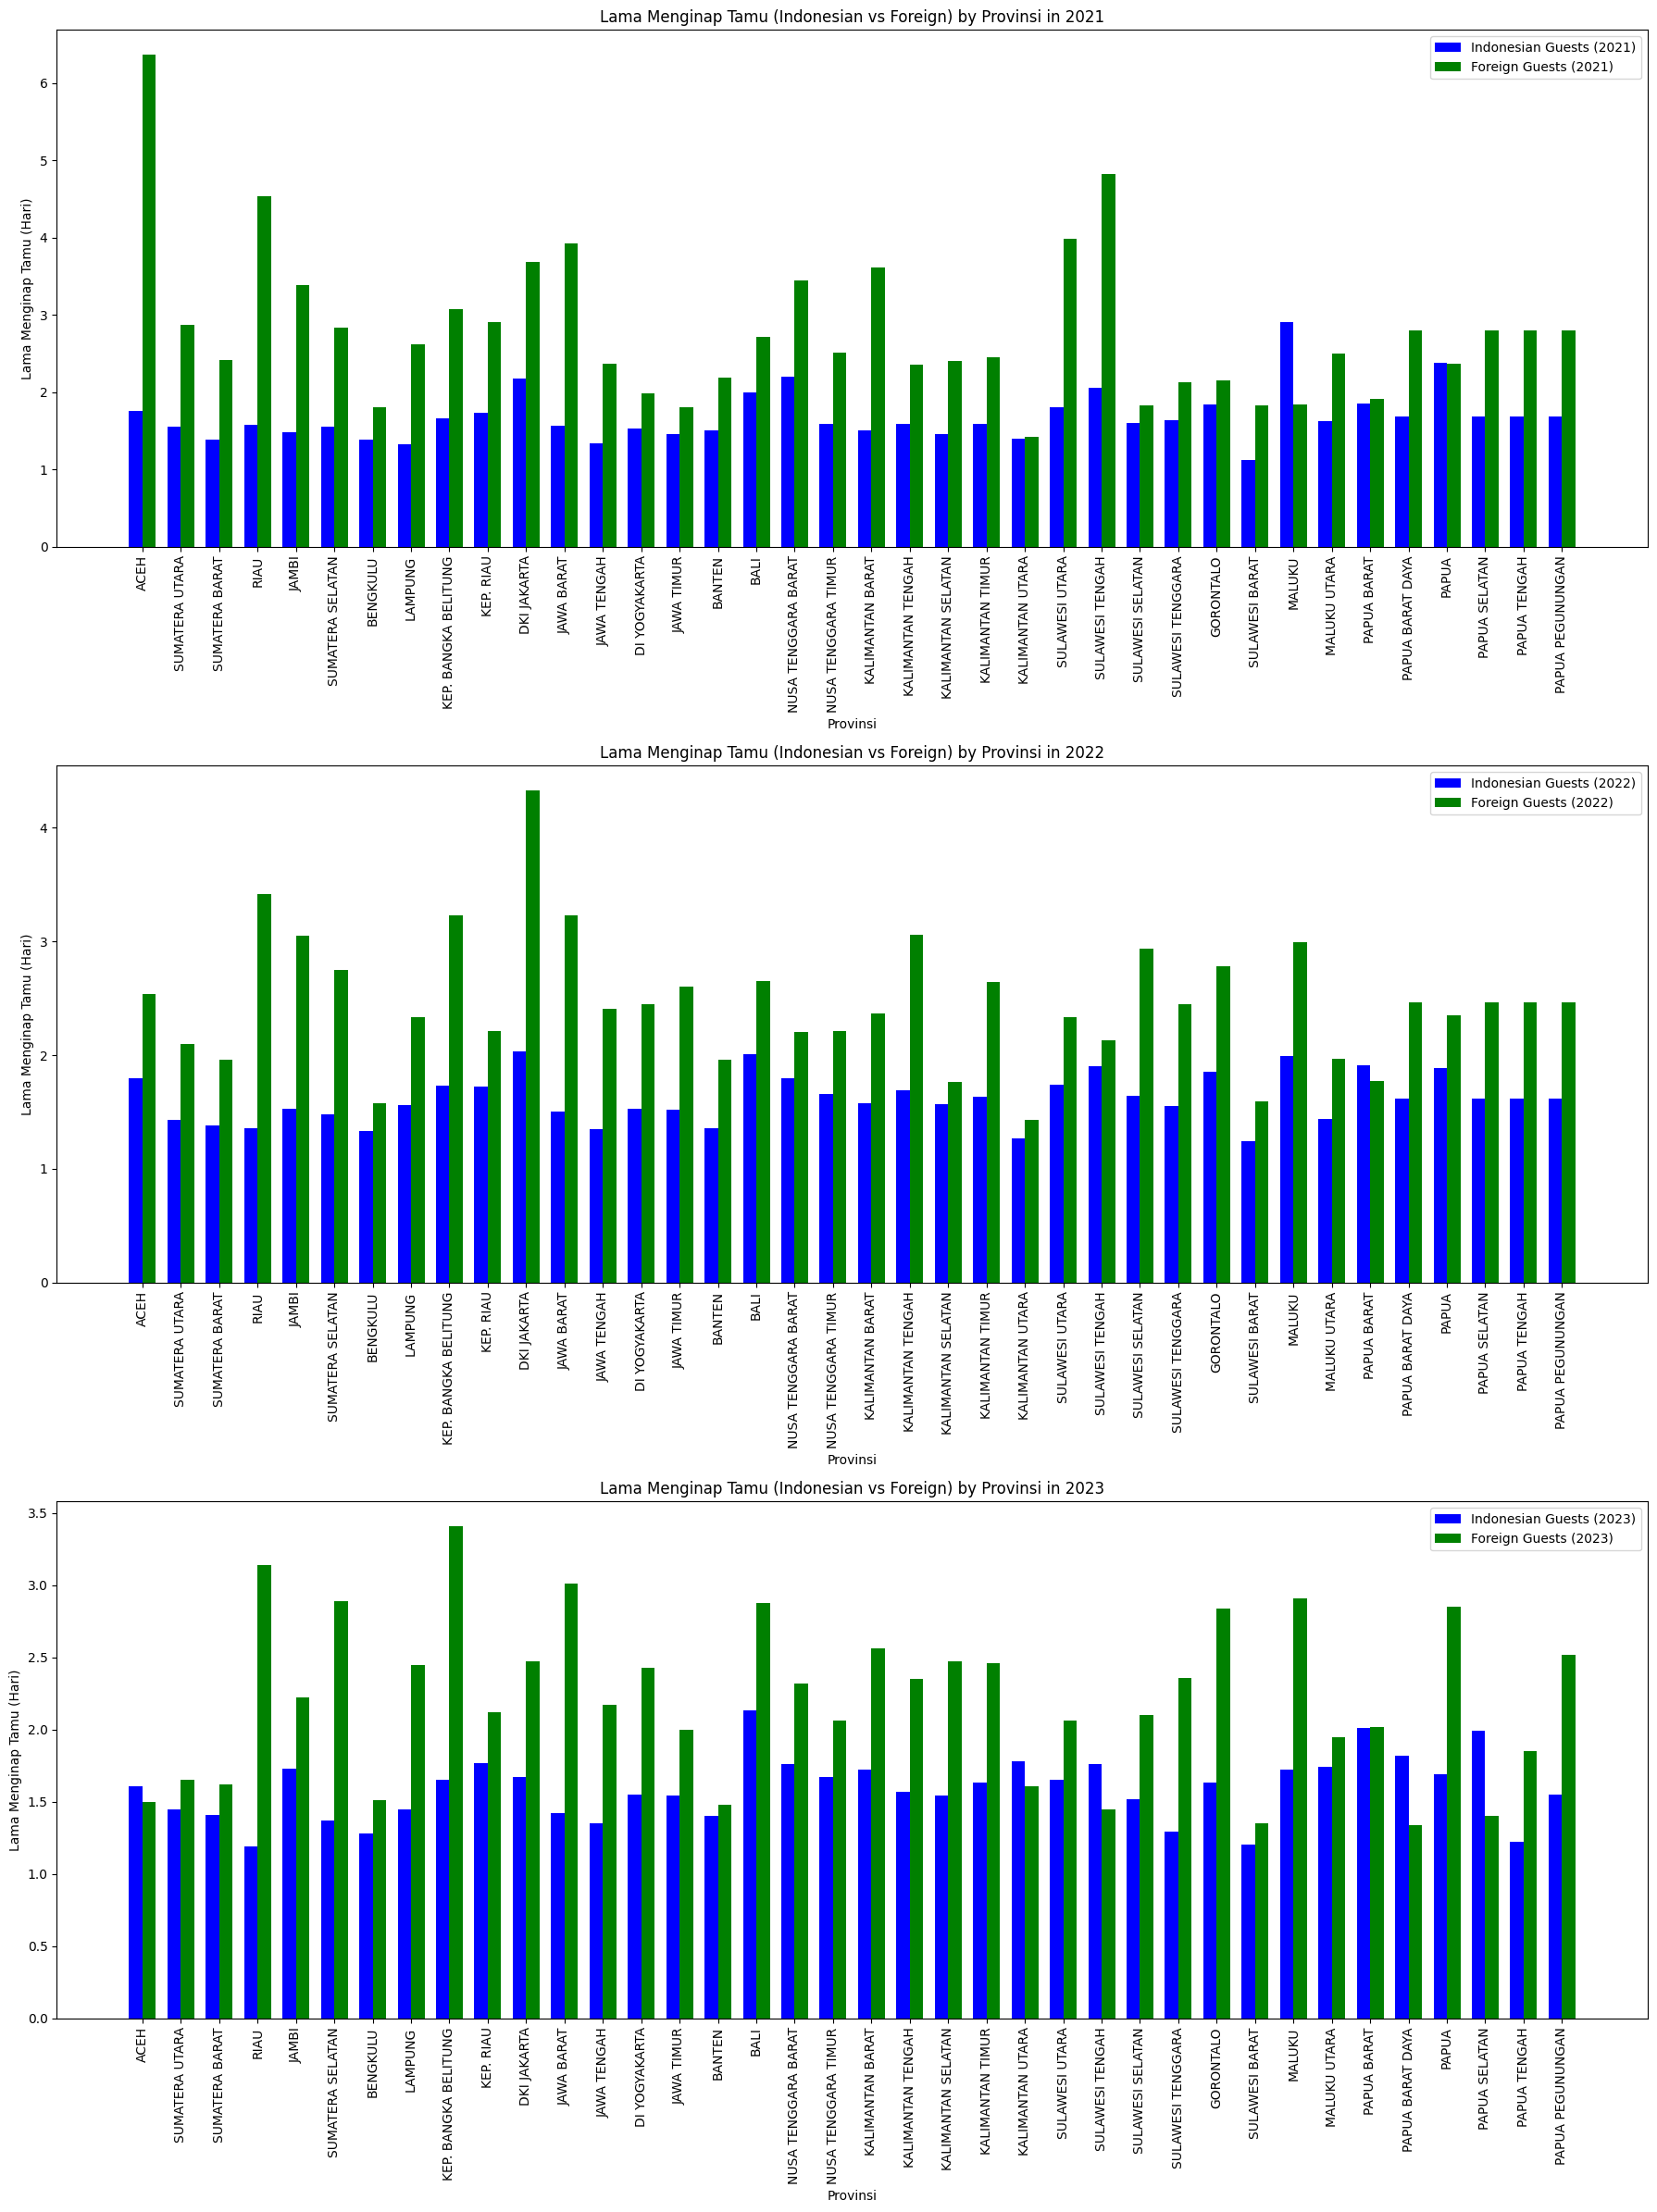

In [26]:
numeric_cols = ['2021_indo', '2022_indo', '2023_indo', '2021_foreign', '2022_foreign', '2023_foreign']

data_lama_menginap_tamu_1 = data_lama_menginap_tamu_1.loc[:, ['Provinsi', '2021_foreign', '2022_foreign', '2023_foreign', '2021_indo', '2022_indo', '2023_indo']]

temp = data_lama_menginap_tamu_1
temp = temp.dropna().reset_index(drop=True)
mean_asing = temp[numeric_cols].apply(pd.to_numeric).mean()

data_lama_menginap_tamu_1[numeric_cols] = data_lama_menginap_tamu_1[numeric_cols].fillna(mean_asing)

# Convert numeric columns to floats
data_lama_menginap_tamu_1[numeric_cols] = data_lama_menginap_tamu_1[numeric_cols].apply(pd.to_numeric, errors='coerce')

fig, ax = plt.subplots(3, 1, figsize=(18, 24))

# Bar chart: Indonesian vs Foreign guests by Province for 2023
bar_width = 0.35
index = range(len(data_lama_menginap_tamu_1))

ax[0].bar(index, data_lama_menginap_tamu_1['2021_indo'], bar_width, label='Indonesian Guests (2021)', color='blue')
ax[0].bar([i + bar_width for i in index], data_lama_menginap_tamu_1['2021_foreign'], bar_width, label='Foreign Guests (2021)', color='green')

ax[0].set_title('Lama Menginap Tamu (Indonesian vs Foreign) by Provinsi in 2021')
ax[0].set_xlabel('Provinsi')
ax[0].set_ylabel('Lama Menginap Tamu (Hari)')
ax[0].set_xticks([i + bar_width / 2 for i in index])
ax[0].set_xticklabels(data_lama_menginap_tamu_1['Provinsi'], rotation=90)
ax[0].legend()

ax[1].bar(index, data_lama_menginap_tamu_1['2022_indo'], bar_width, label='Indonesian Guests (2022)', color='blue')
ax[1].bar([i + bar_width for i in index], data_lama_menginap_tamu_1['2022_foreign'], bar_width, label='Foreign Guests (2022)', color='green')

ax[1].set_title('Lama Menginap Tamu (Indonesian vs Foreign) by Provinsi in 2022')
ax[1].set_xlabel('Provinsi')
ax[1].set_ylabel('Lama Menginap Tamu (Hari)')
ax[1].set_xticks([i + bar_width / 2 for i in index])
ax[1].set_xticklabels(data_lama_menginap_tamu_1['Provinsi'], rotation=90)
ax[1].legend()

ax[2].bar(index, data_lama_menginap_tamu_1['2023_indo'], bar_width, label='Indonesian Guests (2023)', color='blue')
ax[2].bar([i + bar_width for i in index], data_lama_menginap_tamu_1['2023_foreign'], bar_width, label='Foreign Guests (2023)', color='green')

ax[2].set_title('Lama Menginap Tamu (Indonesian vs Foreign) by Provinsi in 2023')
ax[2].set_xlabel('Provinsi')
ax[2].set_ylabel('Lama Menginap Tamu (Hari)')
ax[2].set_xticks([i + bar_width / 2 for i in index])
ax[2].set_xticklabels(data_lama_menginap_tamu_1['Provinsi'], rotation=90)
ax[2].legend()

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


- Berdasarkan ketiga grafik yang menunjukkan data Lama Menginap Tamu (Indonesian vs Foreign) by Provinsi untuk tahun 2021, 2022, dan 2023, berikut beberapa kesimpulan perbandingan:
    - Perubahan dari 2021 ke 2022: Terjadi penurunan signifikan pada lama menginap tamu asing di beberapa provinsi, terutama di Aceh, yang mengalami penurunan drastis dari sekitar 6,5 hari menjadi sekitar 2,5 hari. Lama menginap tamu domestik relatif stabil dengan sedikit peningkatan di beberapa provinsi.
    - Provinsi dengan perbedaan signifikan: Bali konsisten menunjukkan perbedaan yang cukup besar antara lama menginap tamu asing dan domestik, meskipun gap tersebut mengecil dari tahun ke tahun. Provinsi seperti Sumatera Utara, Riau, dan Kepulauan Riau juga menunjukkan perbedaan yang cukup konsisten.
    - Konvergensi: Terlihat adanya tren konvergensi, di mana perbedaan lama menginap antara tamu asing dan domestik semakin mengecil dari 2021 ke 2023 di banyak provinsi.

Kesimpulan ini menunjukkan dinamika yang menarik dalam industri perhotelan dan pariwisata Indonesia, dengan indikasi adanya perubahan pola menginap yang mungkin dipengaruhi oleh faktor-faktor seperti kebijakan pariwisata, pemulihan ekonomi, dan perubahan preferensi wisatawan.

**8. Rata-Rata Lama Tinggal Wisatawan Mancanegara 2021-2023**

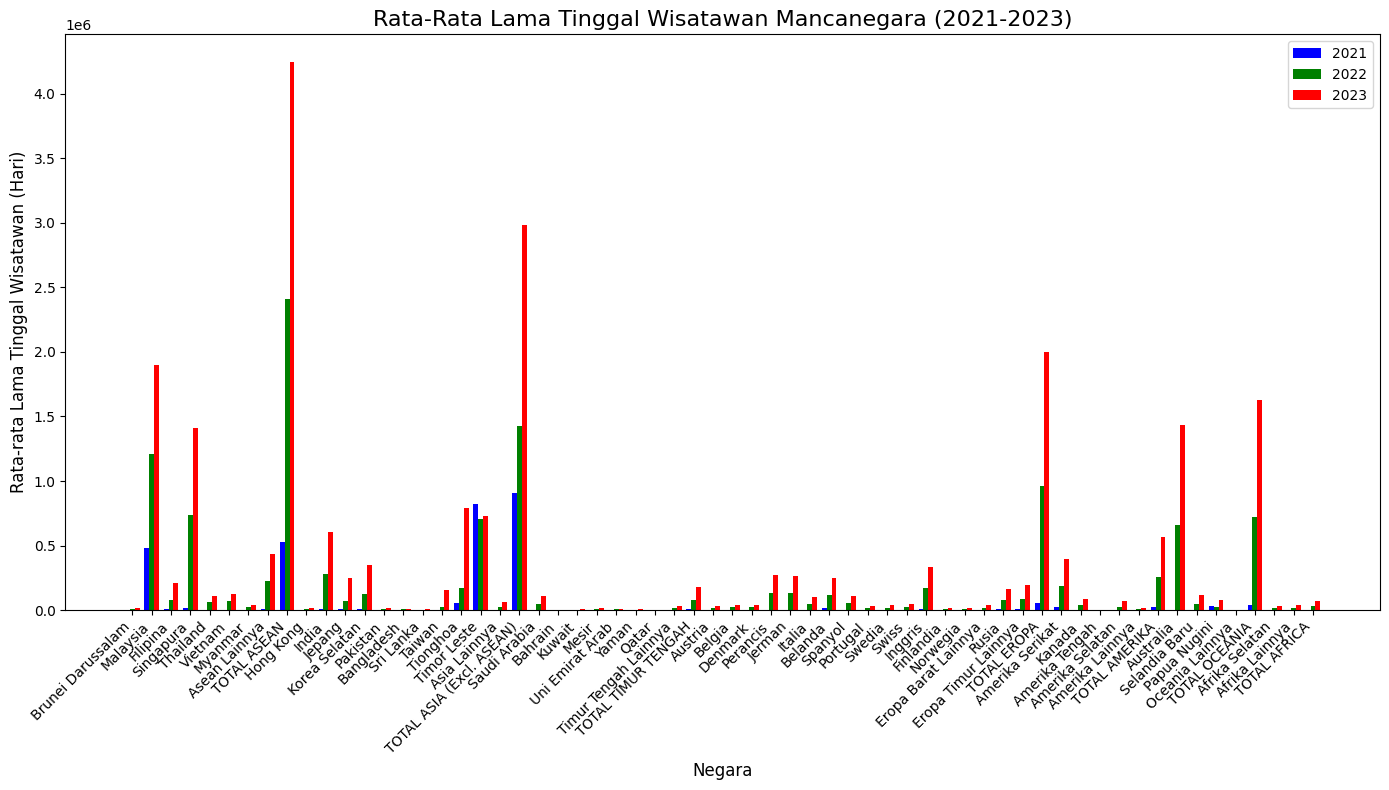

In [27]:
#merge data rata rata wisatawan tinggal

plt.figure(figsize=(14, 8))

# Plot the data for 2021, 2022, and 2023

# Converting the numerical columns to proper data types
data_Jumlah_Kunjungan['2021'] = pd.to_numeric(data_Jumlah_Kunjungan['2021'], errors='coerce')
data_Jumlah_Kunjungan['2022'] = pd.to_numeric(data_Jumlah_Kunjungan['2022'], errors='coerce')
data_Jumlah_Kunjungan['2023'] = pd.to_numeric(data_Jumlah_Kunjungan['2023'], errors='coerce')


bar_width = 0.25
index = np.arange(len(data_Jumlah_Kunjungan))

# Plot bars for each year
plt.bar(index, data_Jumlah_Kunjungan['2021'], bar_width, label='2021', color='b')
plt.bar(index + bar_width, data_Jumlah_Kunjungan['2022'], bar_width, label='2022', color='g')
plt.bar(index + 2 * bar_width, data_Jumlah_Kunjungan['2023'], bar_width, label='2023', color='r')


# Adding labels and title
plt.title('Rata-Rata Lama Tinggal Wisatawan Mancanegara (2021-2023)', fontsize=16)
plt.xlabel('Negara', fontsize=12)
plt.ylabel('Rata-rata Lama Tinggal Wisatawan (Hari)', fontsize=12)

# Adding legend
plt.legend()

# Adding province labels to the x-axis
plt.xticks(index + bar_width, data_Jumlah_Kunjungan['Asal Wisatawan'], rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


- Berdasarkan grafik ini, beberapa kesimpulan dapat ditarik:
    - Tren Peningkatan: Secara umum, terlihat adanya peningkatan rata-rata lama tinggal wisatawan mancanegara dari tahun 2021 ke 2023 untuk sebagian besar negara.
    - Puncak di 2023: Tahun 2023 (batang merah) menunjukkan rata-rata lama tinggal tertinggi untuk banyak negara, mengindikasikan pemulihan sektor pariwisata pasca-pandemi.
    - Total Asia dan Eropa: Kedua kawasan ini menunjukkan peningkatan yang stabil, dengan Eropa memiliki rata-rata lama tinggal yang lebih tinggi dibandingkan Asia. Implikasi untuk Industri Pariwisata: Peningkatan rata-rata lama tinggal ini bisa berdampak positif pada pendapatan sektor pariwisata dan ekonomi terkait di Indonesia.

Kesimpulan ini menunjukkan tren positif dalam industri pariwisata Indonesia, dengan indikasi pemulihan yang kuat dan potensi pertumbuhan lebih lanjut di masa depan.

### Kesimpulan, Hal Menarik Yang Dapat Ditemukan: ###

- Kesimpulan dari analisis data sektor pariwisata di Indonesia pada periode 2021-2023 menunjukkan adanya pemulihan yang positif, terlihat dari meningkatnya jumlah tamu Indonesia dan tamu asing yang menginap di hotel berbintang, terutama di provinsi Bali, DKI Jakarta, dan Jawa Barat. Data pengeluaran wisatawan mancanegara juga mencerminkan pemulihan signifikan pada tahun 2023, meskipun sempat menurun pada tahun sebelumnya. 

- Karakteristik wisatawan dari berbagai negara terlihat dari perbedaan pola pengeluaran dan lama tinggal; wisatawan Spanyol dan Portugal cenderung menghabiskan uang lebih banyak dalam waktu singkat, sedangkan wisatawan Jepang, meskipun mengeluarkan dana lebih sedikit, memiliki durasi tinggal yang lebih lama, menunjukkan kenyamanan mereka di Indonesia.

- Secara keseluruhan, tren ini menandakan potensi pertumbuhan lebih lanjut dalam industri pariwisata dan perhotelan di Indonesia.